## 1- Ecoli Predictive Modelling

### Data Prepration

In [112]:
import pandas as pd

## Read and prepare the water quality measurements
observations = pd.read_json(f"prep_modeling_df.json")
observations.columns = observations.columns.str.lower().str.replace('.', '_')
observations.columns.to_list()

# observations.describe()
obs_columns = ['nz_segment', 'date',  'island', 'region', 'climate', 'geology', 'landcover', 'landcover_lawa', 'swq_landuse', 'src_of_flw',
               'ecoli', 'tn', 'tp', 'flow',
               'air_temp', 'air_temp_mean_dist', 'earth_temp', 'earth_temp_mean_dist', 'rain', 'rain_mean_dist', 'soil_moist', 'soil_moist_mean_dist',
               'mndwi_median', 'mndwi_stdv', 'ndvi_median', 'ndvi_stdv', 'nirv_median', 'nirv_stdv', 'nsmi_median', 'nsmi_stdv',
               'bsi_median', 'bsi_stdv', 'evi_median', 'evi_stdv', 'savi_median', 'savi_stdv', 'ndmi_median', 'ndmi_stdv', 'nbr_median', 'nbr_stdv',
               'ci_median', 'ci_stdv', 'lai_median', 'lai_stdv', 'fapar_median', 'fapar_stdv',
               'elevation_median', 'elevation_stdev','aspect_median','aspect_stdev', 'slope_median', 'slope_stdev', 'tri_median', 'tri_stdev',
                'length_m', 'strahler_order', 'dis_to_sea_m', 'catchment_area_m']

obs = observations[obs_columns]
obs.loc[:, "nz_segment"] = obs.loc[:, "nz_segment"].astype("string")
obs.drop_duplicates(["nz_segment", "date"]).reset_index(drop=True, inplace=True)
obs

,nz_segment,date,island,region,climate,geology,landcover,landcover_lawa,swq_landuse,src_of_flw,...,aspect_median,aspect_stdev,slope_median,slope_stdev,tri_median,tri_stdev,length_m,strahler_order,dis_to_sea_m,catchment_area_m
0,1002765,2019-01-17,North_Island,North Auckland,WW,VA,P,Rural,Rural,L,...,181.288025,106.364782,10.593521,6.568451,7.085887,4.446160,779.11688,6,9348.154,156565856.0
1,1002765,2019-02-12,North_Island,North Auckland,WW,VA,P,Rural,Rural,L,...,181.288025,106.364782,10.593521,6.568451,7.085887,4.446160,779.11688,6,9348.154,156565856.0
2,1002765,2019-04-03,North_Island,North Auckland,WW,VA,P,Rural,Rural,L,...,181.288025,106.364782,10.593521,6.568451,7.085887,4.446160,779.11688,6,9348.154,156565856.0
3,1002765,2019-05-01,North_Island,North Auckland,WW,VA,P,Rural,Rural,L,...,181.288025,106.364782,10.593521,6.568451,7.085887,4.446160,779.11688,6,9348.154,156565856.0
4,1002765,2019-06-05,North_Island,North Auckland,WW,VA,P,Rural,Rural,L,...,181.288025,106.364782,10.593521,6.568451,7.085887,4.446160,779.11688,6,9348.154,156565856.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20607,15320438,2020-08-10,South_Island,Southland,CW,SS,P,Rural,Rural,L,...,198.370239,105.728497,4.516188,5.139452,3.020083,3.444268,3701.90909,4,8425.950,72980104.0
20608,15320438,2020-09-07,South_Island,Southland,CW,SS,P,Rural,Rural,L,...,198.370239,105.728497,4.516188,5.139452,3.020083,3.444268,3701.90909,4,8425.950,72980104.0
20609,15320438,2020-10-12,South_Island,Southland,CW,SS,P,Rural,Rural,L,...,198.370239,105.728497,4.516188,5.139452,3.020083,3.444268,3701.90909,4,8425.950,72980104.0
20610,15320438,2020-11-16,South_Island,Southland,CW,SS,P,Rural,Rural,L,...,198.370239,105.728497,4.516188,5.139452,3.020083,3.444268,3701.90909,4,8425.950,72980104.0


In [113]:
clean_df = obs.dropna(subset=["air_temp_mean_dist", "earth_temp_mean_dist", "rain_mean_dist", "soil_moist_mean_dist"], axis=0)

clean_df = clean_df[clean_df["tri_median"] > clean_df["tri_stdev"]]
# # clean_df = clean_df[clean_df["mndwi_median"] > clean_df["mndwi_stdv"]]
# clean_df = clean_df[clean_df["ndvi_median"] > clean_df["ndvi_stdv"]]
# clean_df = clean_df[clean_df["nirv_median"] > clean_df["nirv_stdv"]]
# # clean_df = clean_df[clean_df["nsmi_median"] > clean_df["nsmi_stdv"]]
# # clean_df = clean_df[clean_df["bsi_median"] > clean_df["bsi_stdv"]]
# # clean_df = clean_df[clean_df["evi_median"] > clean_df["evi_stdv"]]
# # clean_df = clean_df[clean_df["savi_median"] > clean_df["savi_stdv"]]
# # clean_df = clean_df[clean_df["ndmi_median"] > clean_df["ndmi_stdv"]]
# # clean_df = clean_df[clean_df["nbr_median"] > clean_df["nbr_stdv"]]
# # clean_df = clean_df[clean_df["ci_median"] > clean_df["ci_stdv"]]
# # clean_df = clean_df[clean_df["lai_median"] > clean_df["lai_stdv"]]
# clean_df = clean_df[clean_df["fapar_median"] > clean_df["fapar_stdv"]]

clean_df.reset_index(drop=True, inplace=True)

In [114]:
import numpy as np
import pandas as pd
import gc

## Define the thresholds
# thresholds = [0, 130, 260, 540, float('inf')]
thresholds = [0, 130, 540, float('inf')]

## Define the labels for the ordinal levels
# labels = ['L1', 'L2', 'L3', 'L4']
labels = ['L1', 'L2', 'L3']

## Define the target variable
contaminant = 'ecoli'
target = f"{contaminant}_levels"
features = ["mndwi_median", "ndvi_median", "nirv_median", "nsmi_median", "bsi_median", 
           "evi_median", "savi_median", "ndmi_median", "ci_median", "lai_median",
           "air_temp", "earth_temp", "rain", "soil_moist",
           "tri_median"]

## Create the ordinal column based on the thresholds
clean_df[target] = pd.cut(clean_df[contaminant], bins=thresholds, labels=labels, right=False)
clean_df[target] = clean_df[target].astype('category')

## Normalize the features using StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
clean_df[features] = scaler.fit_transform(clean_df[features])

## Select only the target variable and its predictors
selected_columns = features + [target, contaminant]
clean_df = clean_df[selected_columns]

## Clean up rows with No Data values
clean_df = clean_df.replace([np.inf, -np.inf], np.nan)
clean_df = clean_df.dropna(subset=selected_columns)
print("\nNumber of rows with NaN in each column:")
print(clean_df.isnull().sum())

## This unseen data is different from the train / test data
train_obs = clean_df.sample (frac = 0.8, random_state = 786)
test_obs = clean_df.drop (train_obs.index)
test_obs[f"{target}_copy"] = test_obs[target]
test_obs = test_obs.drop(columns=target)

test_obs.reset_index (drop=True, inplace=True)
print('Data for Modeling: ' + str(train_obs.shape))
print('Unseen Data For Predictions: ' + str(test_obs.shape))

## Get the total number of observations in each class
level_counts = clean_df[target].value_counts()
print ('\nN observation in each class:')
print (level_counts)

## Group the DataFrame by the target column
grouped = clean_df.groupby(target, observed=False) ######################## Change "clean_df" to "train_obs" if you like

## Calculate the minimum count for any level
min_count = grouped.size().min()

## Take a random sample of the minimum count from each group
sampled_obs = grouped.apply(lambda x: x.sample(n=min_count))
sampled_obs = sampled_obs.reset_index(drop=True)
print('\nNumber of sampled observations: ' + str(sampled_obs.shape))

train_obs = None
grouped = None
gc.collect()


Number of rows with NaN in each column:
mndwi_median    0
ndvi_median     0
nirv_median     0
nsmi_median     0
bsi_median      0
evi_median      0
savi_median     0
ndmi_median     0
ci_median       0
lai_median      0
air_temp        0
earth_temp      0
rain            0
soil_moist      0
tri_median      0
ecoli_levels    0
ecoli           0
dtype: int64
Data for Modeling: (9079, 17)
Unseen Data For Predictions: (2270, 17)

N observation in each class:
L1    5607
L2    3535
L3    2207
Name: ecoli_levels, dtype: int64

Number of sampled observations: (6621, 17)


8

### Model Building

In [115]:
from pycaret.classification import ClassificationExperiment
clas_exp = ClassificationExperiment()

# ## set tracking uri 
# import mlflow 
# mlflow.set_tracking_uri("file:/D:/OneDrive/Work/Imaginative AI/Projects/Aqua-Anaytica Prepration/mlflow-server")
        
## setup a modelling practice
clas_exp.setup(
    ## *************** General details ***************
    data = sampled_obs, target = target,
    session_id = 123, # A seed value to base the random process
    # log_experiment = False, # Logs the mlexperiment if set to True
    # experiment_name = "reg-default-name", # An identifier to track the experiment in the log file
    
    ## *************** Missing values ***************
    # numeric_imputation = "mean",
    # categorical_imputation = "constant",
    
    ## *************** Normalization and Transformation ***************
    # normalize = True, # Normalizes features to eleminate the unite effect
    # normalize_method = "zscore",
    # transformation = True, # Transforms the features to a more normal distribution
    # fix_imbalance = True, # Deal with unequal distribution of target
    # transform_target = True, # Transforms the target to a more normal distribution
    # bin_numeric_features = ["column_name"], # Converts a continous feature to a categorical feature
                                 # It uses the ‘sturges’ rule to determine the number of bins
                                 # and K-Means clustering to convert continuous into categorical features
    # fix_imbalance = True, # Deals with imbalance target
    
    # *************** Feature Encoding ***************
    # ordinal_features = {'column' : ['low', 'medium', 'high']}
    # numeric_features = ,
    # categorical_features = ["src_of_flw"],
    
    ## *************** Feature selection ***************
    ignore_features = ["#", contaminant], # Ignor some columns in the modelling.
                                          # It gets overwright when "feature_selection" is set True
    # feature_selection = True, # Selects the best feature for predicting the target value
    # n_features_to_select = 0.5, # Minimum number of features, for example top 50%
    remove_multicollinearity = True, # Drops one feature in case of highcolinearity with another feature
    # pca = True, # Uses PCA to reduce the feature space
    # pca_components = 4, # The number of PCA to keep, here frst 4 components
    preprocess = False, # Data must be ready for modeling (no missing values, no dates,
                     # categorical data encoding) when preprocess is set to False.
    
    ## *************** Oveal Tunning ***************
    n_jobs = -1, # Parallel processing (default = -1, all resources)
    # use_gpu = False,
    verbose = True, # To stop printing the information grid
    profile = False, # When set to True, an interactive EDA report is displayed
)

## Get all available estimators
clas_exp.models()

,Description,Value
0,Session id,123
1,Target,ecoli_levels
2,Target type,Multiclass
3,Original data shape,"(6621, 17)"
4,Transformed data shape,"(6621, 16)"
5,Transformed train set shape,"(4634, 16)"
6,Transformed test set shape,"(1987, 16)"
7,Ignore features,2
8,Numeric features,15


,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


#### Create Model Function (Create and tune models seprately and blend them together in a meta model)

In [ ]:
## Compare all available models based on their performances
clas_exp.compare_models()

In [117]:
## Train and optimise the model
lightgbm_model = clas_exp.create_model("lightgbm")
# clas_exp.plot_model(lightgbm_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

tun_lightgbm_model = clas_exp.tune_model(lightgbm_model, n_iter=20, choose_better=True)
# clas_exp.plot_model(tun_lightgbm_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

# # ens_tun_lightgbm_model = clas_exp.ensemble_model(tun_lightgbm_model, method="Boosting")
# # clas_exp.plot_model(ens_tun_lightgbm_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

# # # cal_ens_tun_lightgbm_model = clas_exp.calibrate_model(ens_tun_lightgbm_model)
# # # clas_exp.plot_model(cal_ens_tun_lightgbm_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

final_lightgbm_model = clas_exp.finalize_model(tun_lightgbm_model)

# # ## Analyse the model
# # clas_exp.plot_model(final_lightgbm_model, plot = 'class_report')
# # clas_exp.interpret_model(final_lightgbm_model, plot='reason')
# # ''' Other options for interpret_model() function
# #     'summary': Provides a summary of feature importance.
# #     'correlation': Displays correlation between features.
# #     'reason': Generates a Reason Plot.
# #     'pdp': Generates Partial Dependence Plots.
# #     'msa': Generates Model Sensitive Analysis plots.
# #     'pfi': Generates Permutation Feature Importance plots.
# # '''
## launch evaluate widget
clas_exp.evaluate_model(tun_lightgbm_model)

## Save the model
clas_exp.save_model(
    final_lightgbm_model, 
    model_name =f"final_{contaminant}_lightgbm_model", 
    model_only = False
)



## Train and optimise the model
rf_model = clas_exp.create_model("rf")
# clas_exp.plot_model(rf_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

tun_rf_model = clas_exp.tune_model(rf_model, n_iter=20, choose_better=True)
# clas_exp.plot_model(tun_rf_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

# # ens_tun_rf_model = clas_exp.ensemble_model(tun_rf_model, method="Boosting")
# # clas_exp.plot_model(ens_tun_rf_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

# # cal_ens_tun_rf_model = clas_exp.calibrate_model(ens_tun_rf_model)
# # clas_exp.plot_model(cal_ens_tun_rf_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

final_rf_model = clas_exp.finalize_model(tun_rf_model)

## launch evaluate widget
clas_exp.evaluate_model(tun_rf_model)

# Save the model
clas_exp.save_model(
    final_rf_model, 
    model_name = f"final_{contaminant}_rf_model", 
    model_only = False
)



## Train and optimise the model
gbc_model = clas_exp.create_model("gbc")
# clas_exp.plot_model(gbc_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

tun_gbc_model = clas_exp.tune_model(gbc_model, n_iter=20, choose_better=True)
# clas_exp.plot_model(tun_gbc_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

# # ens_tun_gbc_model = clas_exp.ensemble_model(tun_gbc_model, method="Boosting")
# # clas_exp.plot_model(ens_tun_gbc_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

# # cal_ens_tun_gbc_model = clas_exp.calibrate_model(tun_gbc_model)
# # clas_exp.plot_model(cal_ens_tun_gbc_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

final_gbc_model = clas_exp.finalize_model(tun_gbc_model)

## launch evaluate widget
clas_exp.evaluate_model(tun_gbc_model)

## Save the model
clas_exp.save_model(
    final_gbc_model, 
    model_name = f"final_{contaminant}_gbc_model", 
    model_only = False
)


bld_final_model = clas_exp.blend_models([final_lightgbm_model, final_gbc_model, final_rf_model], method="soft")
# clas_exp.plot_model(bld_final_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})
## Save the model
clas_exp.save_model(
    bld_final_model, 
    model_name = f"final_{contaminant}_blend_model", 
    model_only = False
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5819,0.7634,0.5819,0.5770,0.5744,0.3729,0.3761
1,0.5733,0.7622,0.5733,0.5705,0.5717,0.3599,0.3600
2,0.5647,0.7485,0.5647,0.5637,0.5635,0.3470,0.3475
3,0.5776,0.7524,0.5776,0.5734,0.5712,0.3665,0.3694
4,0.5400,0.7168,0.5400,0.5401,0.5400,0.3099,0.3100
5,0.5378,0.7191,0.5378,0.5343,0.5348,0.3067,0.3075
6,0.5529,0.7401,0.5529,0.5504,0.5510,0.3293,0.3297
7,0.5767,0.7665,0.5767,0.5709,0.5709,0.3649,0.3670
8,0.5529,0.7237,0.5529,0.5479,0.5482,0.3294,0.3308


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5431,0.7338,0.5431,0.5305,0.5297,0.3148,0.3190
1,0.5797,0.7526,0.5797,0.5757,0.5766,0.3697,0.3704
2,0.5431,0.7305,0.5431,0.5292,0.5317,0.3148,0.3177
3,0.5560,0.7426,0.5560,0.5490,0.5483,0.3342,0.3369
4,0.5227,0.7226,0.5227,0.5188,0.5200,0.2839,0.2843
5,0.5572,0.7261,0.5572,0.5524,0.5519,0.3358,0.3376
6,0.5486,0.7270,0.5486,0.5468,0.5468,0.3228,0.3234
7,0.5702,0.7510,0.5702,0.5598,0.5622,0.3552,0.3572
8,0.5659,0.7254,0.5659,0.5586,0.5576,0.3488,0.3517


Fitting 10 folds for each of 20 candidates, totalling 200 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Transformation Pipeline and Model Successfully Saved


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5625,0.7440,0.5625,0.5565,0.5585,0.3438,0.3444
1,0.5625,0.7430,0.5625,0.5566,0.5587,0.3438,0.3443
2,0.5496,0.7239,0.5496,0.5499,0.5479,0.3245,0.3255
3,0.5668,0.7379,0.5668,0.5600,0.5610,0.3503,0.3519
4,0.5184,0.7115,0.5184,0.5128,0.5145,0.2774,0.2780
5,0.5205,0.7039,0.5205,0.5183,0.5177,0.2808,0.2818
6,0.5421,0.7261,0.5421,0.5425,0.5423,0.3132,0.3132
7,0.5702,0.7549,0.5702,0.5632,0.5642,0.3552,0.3569
8,0.5270,0.7204,0.5270,0.5226,0.5236,0.2905,0.2912


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5431,0.7324,0.5431,0.5363,0.5378,0.3147,0.3160
1,0.5323,0.7381,0.5323,0.5299,0.5308,0.2985,0.2987
2,0.5345,0.7112,0.5345,0.5290,0.5260,0.3019,0.3056
3,0.5259,0.7182,0.5259,0.5165,0.5170,0.2890,0.2915
4,0.4860,0.6974,0.4860,0.4804,0.4825,0.2289,0.2293
5,0.5313,0.7054,0.5313,0.5291,0.5296,0.2970,0.2973
6,0.5486,0.7269,0.5486,0.5441,0.5441,0.3228,0.3242
7,0.5227,0.7348,0.5227,0.5158,0.5165,0.2839,0.2856
8,0.5335,0.7188,0.5335,0.5305,0.5313,0.3002,0.3006


Fitting 10 folds for each of 20 candidates, totalling 200 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Transformation Pipeline and Model Successfully Saved


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5647,0.7392,0.5647,0.5612,0.5566,0.3471,0.3508
1,0.5366,0.7345,0.5366,0.5326,0.5342,0.3050,0.3052
2,0.5409,0.7274,0.5409,0.5322,0.5337,0.3116,0.3134
3,0.5647,0.7490,0.5647,0.5599,0.5588,0.3471,0.3495
4,0.5486,0.7193,0.5486,0.5471,0.5476,0.3229,0.3230
5,0.5205,0.7129,0.5205,0.5182,0.5184,0.2808,0.2814
6,0.5400,0.7248,0.5400,0.5369,0.5378,0.3099,0.3103
7,0.5659,0.7534,0.5659,0.5655,0.5641,0.3487,0.3498
8,0.5529,0.7206,0.5529,0.5504,0.5502,0.3294,0.3303


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5754,0.7597,0.5754,0.5704,0.5704,0.3632,0.3648
1,0.5668,0.7676,0.5668,0.5672,0.5670,0.3502,0.3502
2,0.6034,0.7633,0.6034,0.6042,0.6025,0.4052,0.4061
3,0.5647,0.7617,0.5647,0.5612,0.5621,0.3471,0.3476
4,0.5421,0.7377,0.5421,0.5411,0.5416,0.3132,0.3132
5,0.5421,0.7219,0.5421,0.5394,0.5403,0.3132,0.3135
6,0.5832,0.7471,0.5832,0.5885,0.5846,0.3747,0.3754
7,0.5724,0.7544,0.5724,0.5688,0.5698,0.3585,0.3590
8,0.5940,0.7434,0.5940,0.5905,0.5915,0.3909,0.3915


Fitting 10 folds for each of 20 candidates, totalling 200 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Transformation Pipeline and Model Successfully Saved


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5905,0.7695,0.5905,0.5850,0.5859,0.3858,0.3870
1,0.5841,0.7720,0.5841,0.5834,0.5835,0.3760,0.3762
2,0.5948,0.7605,0.5948,0.5930,0.5925,0.3923,0.3932
3,0.5905,0.7640,0.5905,0.5863,0.5862,0.3859,0.3874
4,0.5464,0.7340,0.5464,0.5445,0.5453,0.3196,0.3197
5,0.5443,0.7265,0.5443,0.5423,0.5427,0.3164,0.3168
6,0.5767,0.7508,0.5767,0.5778,0.5762,0.3649,0.3656
7,0.5810,0.7688,0.5810,0.5747,0.5755,0.3714,0.3730
8,0.5832,0.7426,0.5832,0.5792,0.5800,0.3747,0.3755


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('placeholder', None),
                 ('trained_model',
                  VotingClassifier(estimators=[('Light Gradient Boosting '
                                                'Machine',
                                                Pipeline(memory=Memory(location=None),
                                                         steps=[('placeholder',
                                                                 None),
                                                                ('actual_estimator',
                                                                 LGBMClassifier(boosting_type='gbdt',
                                                                                class_weight=None,
                                                                                colsample_bytree=1.0,
                                                                                importance_type='split',
                   

#### Compare Model Function (Compare, select, create, tune, and blend several models at once)

In [ ]:
# top_n = clas_exp.compare_models(n_select = 3)
# tun_top_n = [clas_exp.tune_model(model, n_iter=10, fold=10, choose_better = True) for model in top_n]
# ens_tun_top_n = [clas_exp.ensemble_model(model, method="Boosting") for model in tun_top_n]
# bld_ens_tun_top_n = clas_exp.blend_models([ens_tun_top_n[0], ens_tun_top_n[1], ens_tun_top_n[2]], method="soft")

In [ ]:
# clas_exp.plot_model(bld_ens_tun_top_n, plot = 'confusion_matrix')
# # clas_exp.plot_model(bld_ens_tun_top_n, plot = 'class_report')

In [ ]:
# # calibrated_blend_boost_tunned_top_n = clas_exp.calibrate_model(blend_boost_tunned_top_n)
# final_model = clas_exp.finalize_model(bld_ens_tun_top_n)
# clas_exp.plot_model(final_model, plot = 'confusion_matrix')

In [ ]:
# ## Save the model
# clas_exp.save_model(
#     final_model, 
#     model_name = "final_top_n_ecoli_models", 
#     model_only = False
# )

### Model Implementation

In [41]:
from pycaret.classification import ClassificationExperiment
clas_exp = ClassificationExperiment()

# ## set tracking uri 
# import mlflow 
# mlflow.set_tracking_uri("file:/D:/OneDrive/Work/Imaginative AI/Projects/Aqua-Anaytica Prepration/mlflow-server")
        
## setup a modelling practice
clas_exp.setup(
    data = sampled_obs, target = target,
    session_id = 123, # A seed value to base the random process
    ignore_features = ["#", contaminant], # Ignor some columns in the modelling.
    remove_multicollinearity = True, # Drops one feature in case of highcolinearity with another feature
    preprocess = False, # Data must be ready for modeling (no missing values, no dates,
    n_jobs = -1, # Parallel processing (default = -1, all resources)
    verbose = True, # To stop printing the information grid
    profile = False, # When set to True, an interactive EDA report is displayed
)

## Get all available estimators
clas_exp.models()

## Load and evaluate the model
bld_final_model = clas_exp.load_model(model_name = "final_ecoli_blend_model",  verbose = True)

,Description,Value
0,Session id,123
1,Target,ecoli_levels
2,Target type,Multiclass
3,Original data shape,"(5286, 17)"
4,Transformed data shape,"(5286, 16)"
5,Transformed train set shape,"(3700, 16)"
6,Transformed test set shape,"(1586, 16)"
7,Ignore features,2
8,Numeric features,15


Transformation Pipeline and Model Successfully Loaded


In [48]:
%%capture
## Predict on test set
pred_level = clas_exp.predict_model(bld_final_model, raw_score=True, data=test_obs,);

#### Testing the Accurecy

In [49]:
## Rename the columns
pred_level = pred_level.rename(
    columns={
        "prediction_label": f"pred_{contaminant}",
        "prediction_score_0": f"pred_{contaminant}_L1_score",
        "prediction_score_1": f"pred_{contaminant}_L2_score",
        "prediction_score_2":  f"pred_{contaminant}_L3_score",
    }
)
pred_level

,mndwi_median,ndvi_median,nirv_median,nsmi_median,bsi_median,evi_median,savi_median,ndmi_median,ci_median,lai_median,...,earth_temp,rain,soil_moist,tri_median,ecoli,ecoli_levels_copy,pred_ecoli,pred_ecoli_L1_score,pred_ecoli_L2_score,pred_ecoli_L3_score
0,0.286004,0.707704,0.475933,0.391213,0.608774,0.505154,0.707505,0.391213,0.390457,0.000000e+00,...,0.779686,0.000000,0.258354,0.279147,370.0,L2,L2,0.1308,0.5672,0.3020
1,0.249937,0.851451,0.454511,0.492350,0.507633,0.493458,0.848044,0.492350,0.341044,0.000000e+00,...,0.434215,0.020968,0.445174,0.279147,360.0,L2,L2,0.1341,0.5309,0.3350
2,0.294004,0.785964,0.515528,0.499173,0.500816,0.543056,0.785072,0.499173,0.329522,6.391774e-25,...,0.532999,0.000000,0.540708,0.279147,240.0,L2,L3,0.1573,0.3643,0.4784
3,0.248916,0.705923,0.421014,0.317007,0.682984,0.472547,0.707530,0.317007,0.445744,0.000000e+00,...,0.755358,0.000000,0.143291,0.279147,650.0,L3,L3,0.0871,0.3219,0.5911
4,0.306058,0.785946,0.454508,0.492383,0.507611,0.527174,0.785056,0.492383,0.324195,0.000000e+00,...,0.385368,0.019355,0.619055,0.279147,190.0,L2,L2,0.1305,0.5614,0.3081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2265,0.261913,0.844149,0.832861,0.492418,0.507570,0.500767,0.840820,0.492418,0.246832,0.000000e+00,...,0.458835,0.283505,0.224624,0.006510,400.0,L2,L3,0.0642,0.4561,0.4797
2266,0.253933,0.844181,0.726093,0.505873,0.494119,0.483376,0.840833,0.505873,0.250912,0.000000e+00,...,0.358748,0.014260,0.736905,0.006510,310.0,L2,L3,0.0284,0.2589,0.7127
2267,0.314066,0.866025,0.445399,0.613797,0.386188,0.594204,0.870014,0.613797,0.163157,0.000000e+00,...,0.163072,0.043643,0.577130,0.004699,260.0,L2,L3,0.2415,0.3147,0.4438
2268,0.281965,0.844130,0.634622,0.566581,0.433393,0.528156,0.850404,0.566581,0.257873,0.000000e+00,...,0.163072,0.043631,0.577130,0.001775,120.0,L1,L2,0.3072,0.4482,0.2445


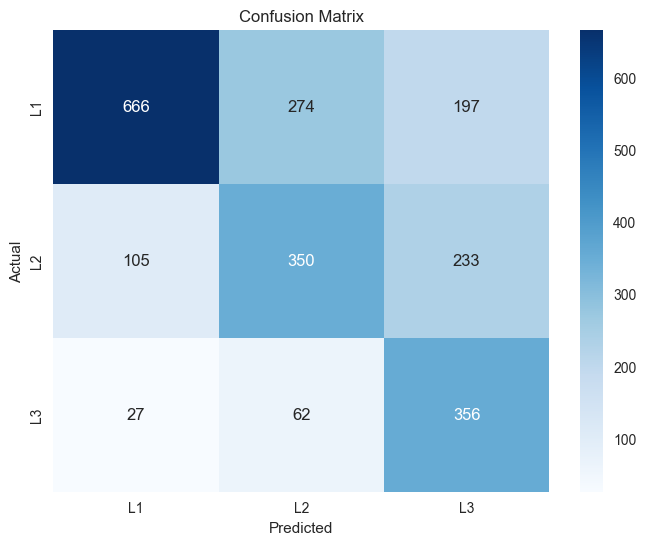

In [54]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create the confusion matrix
confusion = confusion_matrix(pred_level[f"{target}_copy"], pred_level[f"pred_{contaminant}"], labels=labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [57]:
## Get the total number of observations in each class
level_counts = pred_level[f"{target}_copy"].value_counts()
print ('\nN observation in each class:')
print (level_counts)

level_counts2 = pred_level[f"pred_{contaminant}"].value_counts()
print ('\nN observation in each class:')
print (level_counts2)


N observation in each class:
L1    1137
L2     688
L3     445
Name: ecoli_levels_copy, dtype: int64

N observation in each class:
L1    798
L3    786
L2    686
Name: pred_ecoli, dtype: int64


In [59]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for each level
accuracy_by_level = {}
for label in labels:
    true_positives = confusion[labels.index(label), labels.index(label)]
    total_predictions = sum(confusion[labels.index(label)])
    accuracy = true_positives / total_predictions
    accuracy_by_level[label] = accuracy
    print(f"Accuracy for {label}: {accuracy:.2f}")

# Calculate overall accuracy
overall_accuracy = accuracy_score(pred_level[f"{target}_copy"], pred_level[f"pred_{contaminant}"])
print(f"Overall Accuracy: {overall_accuracy:.2f}")


Accuracy for L1: 0.59
Accuracy for L2: 0.51
Accuracy for L3: 0.80
Overall Accuracy: 0.60


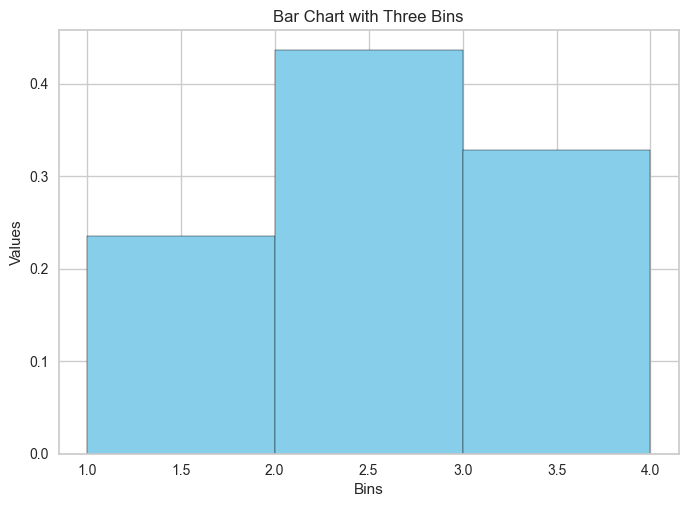

In [66]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

t = 102
p_c1 = pred_level.iloc[t][f"pred_{contaminant}_L1_score"]
p_c2 = pred_level.iloc[t][f"pred_{contaminant}_L2_score"]
p_c3 = pred_level.iloc[t][f"pred_{contaminant}_L3_score"]


## Probabilities for each class
thresholds = [0, 130, 560, 1000]
thresholds = [1, 2, 3, 4]
probabilities = [p_c1, p_c2, p_c3]


## Plot the bar chart
plt.bar(thresholds[:-1], probabilities, width=np.diff(thresholds), align='edge', color='skyblue', edgecolor='black')


## Add labels and title
plt.xlabel('Bins')
plt.ylabel('Values')
plt.title('Bar Chart with Three Bins')


## Show the plot
plt.show()

0.055
0.167
0.778


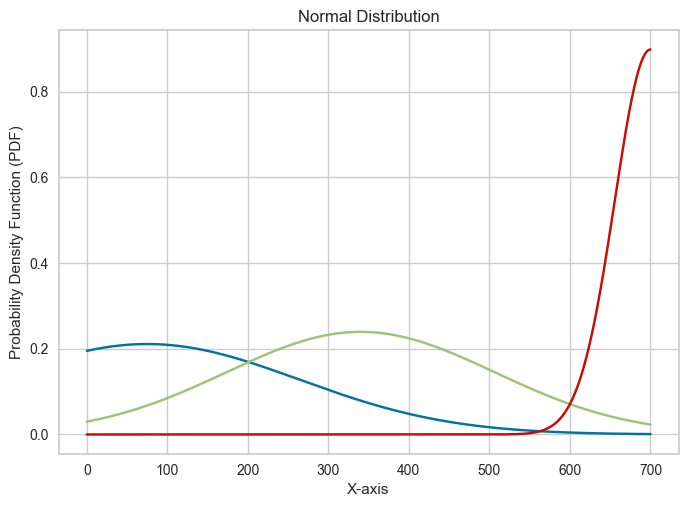

In [67]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# pred_level[pred_level[contaminant] > 3000.0]
min_contaminant = pred_level[contaminant].min()
max_contaminant = pred_level[contaminant].max()
mean_contaminant = pred_level[contaminant].mean()
std_contaminant = pred_level[contaminant].std()

t = 190
p_c1 = pred_level.iloc[t][f"pred_{contaminant}_L1_score"]
p_c2 = pred_level.iloc[t][f"pred_{contaminant}_L2_score"]
p_c3 = pred_level.iloc[t][f"pred_{contaminant}_L3_score"]

## Probabilities for each class
thresholds = [75, 340, 700]
probabilities = [p_c1, p_c2, p_c3]

for index, probablity in enumerate(probabilities):
    print(probablity)
    # Set the mean and standard deviation
    mean = thresholds[index]
    std_dev = (1 - probablity) * 200
    
    # Set the range for the x-axis
    x_start = 0
    x_end = 700
    
    # Generate data points for the normal distribution within the specified range
    x_values = np.linspace(x_start, x_end, 1000)
    y_values = norm.pdf(x_values, mean, std_dev) * 100
    
    # Plot the normal distribution
    plt.plot(x_values, y_values, label=f'Normal Distribution (Mean = {mean}, Std Dev = {std_dev})')

# Add labels and a legend
plt.title('Normal Distribution')
plt.xlabel('X-axis')
plt.ylabel('Probability Density Function (PDF)')
# plt.legend()

# Show the plot
plt.show()

## 2- TN Predictive Modelling

### Data Prepration

In [105]:
import pandas as pd

## Read and prepare the water quality measurements
observations = pd.read_json(f"prep_modeling_df.json")
observations.columns = observations.columns.str.lower().str.replace('.', '_')
observations.columns.to_list()

# observations.describe()
obs_columns = ['nz_segment', 'date',  'island', 'region', 'climate', 'geology', 'landcover', 'landcover_lawa', 'swq_landuse', 'src_of_flw',
               'ecoli', 'tn', 'tp', 'flow',
               'air_temp', 'air_temp_mean_dist', 'earth_temp', 'earth_temp_mean_dist', 'rain', 'rain_mean_dist', 'soil_moist', 'soil_moist_mean_dist',
               'mndwi_median', 'mndwi_stdv', 'ndvi_median', 'ndvi_stdv', 'nirv_median', 'nirv_stdv', 'nsmi_median', 'nsmi_stdv',
               'bsi_median', 'bsi_stdv', 'evi_median', 'evi_stdv', 'savi_median', 'savi_stdv', 'ndmi_median', 'ndmi_stdv', 'nbr_median', 'nbr_stdv',
               'ci_median', 'ci_stdv', 'lai_median', 'lai_stdv', 'fapar_median', 'fapar_stdv',
               'elevation_median', 'elevation_stdev','aspect_median','aspect_stdev', 'slope_median', 'slope_stdev', 'tri_median', 'tri_stdev',
                'length_m', 'strahler_order', 'dis_to_sea_m', 'catchment_area_m']

obs = observations[obs_columns]
obs.loc[:, "nz_segment"] = obs.loc[:, "nz_segment"].astype("string")
obs.drop_duplicates(["nz_segment", "date"]).reset_index(drop=True, inplace=True)
obs

,nz_segment,date,island,region,climate,geology,landcover,landcover_lawa,swq_landuse,src_of_flw,...,aspect_median,aspect_stdev,slope_median,slope_stdev,tri_median,tri_stdev,length_m,strahler_order,dis_to_sea_m,catchment_area_m
0,1002765,2019-01-17,North_Island,North Auckland,WW,VA,P,Rural,Rural,L,...,181.288025,106.364782,10.593521,6.568451,7.085887,4.446160,779.11688,6,9348.154,156565856.0
1,1002765,2019-02-12,North_Island,North Auckland,WW,VA,P,Rural,Rural,L,...,181.288025,106.364782,10.593521,6.568451,7.085887,4.446160,779.11688,6,9348.154,156565856.0
2,1002765,2019-04-03,North_Island,North Auckland,WW,VA,P,Rural,Rural,L,...,181.288025,106.364782,10.593521,6.568451,7.085887,4.446160,779.11688,6,9348.154,156565856.0
3,1002765,2019-05-01,North_Island,North Auckland,WW,VA,P,Rural,Rural,L,...,181.288025,106.364782,10.593521,6.568451,7.085887,4.446160,779.11688,6,9348.154,156565856.0
4,1002765,2019-06-05,North_Island,North Auckland,WW,VA,P,Rural,Rural,L,...,181.288025,106.364782,10.593521,6.568451,7.085887,4.446160,779.11688,6,9348.154,156565856.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20607,15320438,2020-08-10,South_Island,Southland,CW,SS,P,Rural,Rural,L,...,198.370239,105.728497,4.516188,5.139452,3.020083,3.444268,3701.90909,4,8425.950,72980104.0
20608,15320438,2020-09-07,South_Island,Southland,CW,SS,P,Rural,Rural,L,...,198.370239,105.728497,4.516188,5.139452,3.020083,3.444268,3701.90909,4,8425.950,72980104.0
20609,15320438,2020-10-12,South_Island,Southland,CW,SS,P,Rural,Rural,L,...,198.370239,105.728497,4.516188,5.139452,3.020083,3.444268,3701.90909,4,8425.950,72980104.0
20610,15320438,2020-11-16,South_Island,Southland,CW,SS,P,Rural,Rural,L,...,198.370239,105.728497,4.516188,5.139452,3.020083,3.444268,3701.90909,4,8425.950,72980104.0


In [106]:
clean_df = obs.dropna(subset=["air_temp_mean_dist", "earth_temp_mean_dist", "rain_mean_dist", "soil_moist_mean_dist"], axis=0)

clean_df = clean_df[clean_df["tri_median"] > clean_df["tri_stdev"]]
# # clean_df = clean_df[clean_df["mndwi_median"] > clean_df["mndwi_stdv"]]
# clean_df = clean_df[clean_df["ndvi_median"] > clean_df["ndvi_stdv"]]
# clean_df = clean_df[clean_df["nirv_median"] > clean_df["nirv_stdv"]]
# # clean_df = clean_df[clean_df["nsmi_median"] > clean_df["nsmi_stdv"]]
# # clean_df = clean_df[clean_df["bsi_median"] > clean_df["bsi_stdv"]]
# # clean_df = clean_df[clean_df["evi_median"] > clean_df["evi_stdv"]]
# # clean_df = clean_df[clean_df["savi_median"] > clean_df["savi_stdv"]]
# # clean_df = clean_df[clean_df["ndmi_median"] > clean_df["ndmi_stdv"]]
# # clean_df = clean_df[clean_df["nbr_median"] > clean_df["nbr_stdv"]]
# # clean_df = clean_df[clean_df["ci_median"] > clean_df["ci_stdv"]]
# # clean_df = clean_df[clean_df["lai_median"] > clean_df["lai_stdv"]]
# clean_df = clean_df[clean_df["fapar_median"] > clean_df["fapar_stdv"]]

clean_df.reset_index(drop=True, inplace=True)

In [108]:
import numpy as np
import pandas as pd
import gc

## Define the thresholds
# thresholds = [0, 0.16, 0.35, 0.75, float('inf')]
thresholds = [0, 0.16, 0.75, float('inf')]

# Define the labels for the ordinal levels
# labels = ['L1', 'L2', 'L3', 'L4']
labels = ['L1', 'L2', 'L3']

## Define the target variable
contaminant = 'tn'
target = f"{contaminant}_levels"
features = ["mndwi_median", "ndvi_median", "nirv_median", "nsmi_median", "bsi_median", 
           "evi_median", "savi_median", "ndmi_median", "ci_median", "lai_median",
           "air_temp", "earth_temp", "rain", "soil_moist",
           "tri_median"]

## Create the ordinal column based on the thresholds
clean_df[target] = pd.cut(clean_df[contaminant], bins=thresholds, labels=labels, right=False)
clean_df[target] = clean_df[target].astype('category')

## Normalize the features using StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
clean_df[features] = scaler.fit_transform(clean_df[features])

## Select only the target variable and its predictors
selected_columns = features + [target, contaminant]
clean_df = clean_df[selected_columns]

## Clean up rows with No Data values
clean_df = clean_df.replace([np.inf, -np.inf], np.nan)
clean_df = clean_df.dropna(subset=selected_columns)
print("\nNumber of rows with NaN in each column:")
print(clean_df.isnull().sum())

## This unseen data is different from the train / test data
train_obs = clean_df.sample (frac = 0.8, random_state = 786)
test_obs = clean_df.drop (train_obs.index)
test_obs[f"{target}_copy"] = test_obs[target]
test_obs = test_obs.drop(columns=target)

test_obs.reset_index (drop=True, inplace=True)
print('Data for Modeling: ' + str(train_obs.shape))
print('Unseen Data For Predictions: ' + str(test_obs.shape))

## Get the total number of observations in each class
level_counts = clean_df[target].value_counts()
print ('\nN observation in each class:')
print (level_counts)

## Group the DataFrame by the target column
grouped = clean_df.groupby(target, observed=False) ######################## Change "clean_df" to "train_obs" if you like

## Calculate the minimum count for any level
min_count = grouped.size().min()

## Take a random sample of the minimum count from each group
sampled_obs = grouped.apply(lambda x: x.sample(n=min_count))
sampled_obs = sampled_obs.reset_index(drop=True)
print('\nNumber of sampled observations: ' + str(sampled_obs.shape))

train_obs = None
grouped = None
gc.collect()


Number of rows with NaN in each column:
mndwi_median    0
ndvi_median     0
nirv_median     0
nsmi_median     0
bsi_median      0
evi_median      0
savi_median     0
ndmi_median     0
ci_median       0
lai_median      0
air_temp        0
earth_temp      0
rain            0
soil_moist      0
tri_median      0
tn_levels       0
tn              0
dtype: int64
Data for Modeling: (8970, 17)
Unseen Data For Predictions: (2242, 17)

N observation in each class:
L2    5611
L3    2960
L1    2641
Name: tn_levels, dtype: int64

Number of sampled observations: (7923, 17)


3800

### Model Building

In [109]:
from pycaret.classification import ClassificationExperiment
clas_exp = ClassificationExperiment()

# ## set tracking uri 
# import mlflow 
# mlflow.set_tracking_uri("file:/D:/OneDrive/Work/Imaginative AI/Projects/Aqua-Anaytica Prepration/mlflow-server")
        
## setup a modelling practice
clas_exp.setup(
    ## *************** General details ***************
    data = sampled_obs, target = target,
    session_id = 123, # A seed value to base the random process
    # log_experiment = False, # Logs the mlexperiment if set to True
    # experiment_name = "reg-default-name", # An identifier to track the experiment in the log file
    
    ## *************** Missing values ***************
    # numeric_imputation = "mean",
    # categorical_imputation = "constant",
    
    ## *************** Normalization and Transformation ***************
    # normalize = True, # Normalizes features to eleminate the unite effect
    # normalize_method = "zscore",
    # transformation = True, # Transforms the features to a more normal distribution
    # fix_imbalance = True, # Deal with unequal distribution of target
    # transform_target = True, # Transforms the target to a more normal distribution
    # bin_numeric_features = ["column_name"], # Converts a continous feature to a categorical feature
                                 # It uses the ‘sturges’ rule to determine the number of bins
                                 # and K-Means clustering to convert continuous into categorical features
    # fix_imbalance = True, # Deals with imbalance target
    
    # *************** Feature Encoding ***************
    # ordinal_features = {'column' : ['low', 'medium', 'high']}
    # numeric_features = ,
    # categorical_features = ["src_of_flw"],
    
    ## *************** Feature selection ***************
    ignore_features = ["#", contaminant], # Ignor some columns in the modelling.
                                          # It gets overwright when "feature_selection" is set True
    # feature_selection = True, # Selects the best feature for predicting the target value
    # n_features_to_select = 0.5, # Minimum number of features, for example top 50%
    remove_multicollinearity = True, # Drops one feature in case of highcolinearity with another feature
    # pca = True, # Uses PCA to reduce the feature space
    # pca_components = 4, # The number of PCA to keep, here frst 4 components
    preprocess = False, # Data must be ready for modeling (no missing values, no dates,
                     # categorical data encoding) when preprocess is set to False.
    
    ## *************** Oveal Tunning ***************
    n_jobs = -1, # Parallel processing (default = -1, all resources)
    # use_gpu = False,
    verbose = True, # To stop printing the information grid
    profile = False, # When set to True, an interactive EDA report is displayed
)

## Get all available estimators
clas_exp.models()

,Description,Value
0,Session id,123
1,Target,tn_levels
2,Target type,Multiclass
3,Original data shape,"(7923, 17)"
4,Transformed data shape,"(7923, 16)"
5,Transformed train set shape,"(5546, 16)"
6,Transformed test set shape,"(2377, 16)"
7,Ignore features,2
8,Numeric features,15


,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


#### Create Model Function (Create and tune models seprately and blend them together in a meta model)

In [74]:
## Compare all available models based on their performances
clas_exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6913,0.8590,0.6913,0.6915,0.6908,0.5369,0.5374,1.6150
rf,Random Forest Classifier,0.6770,0.8438,0.6770,0.6736,0.6742,0.5155,0.5164,0.5830
gbc,Gradient Boosting Classifier,0.6734,0.8443,0.6734,0.6738,0.6730,0.5101,0.5106,1.5180
et,Extra Trees Classifier,0.6700,0.8388,0.6700,0.6689,0.6687,0.5050,0.5055,0.0960
knn,K Neighbors Classifier,0.6335,0.7972,0.6335,0.6320,0.6309,0.4503,0.4517,0.4630
lr,Logistic Regression,0.6172,0.7974,0.6172,0.6101,0.6122,0.4259,0.4270,0.5090
lda,Linear Discriminant Analysis,0.6127,0.7942,0.6127,0.6074,0.6090,0.4191,0.4198,0.0130
ada,Ada Boost Classifier,0.6016,0.7388,0.6016,0.6128,0.6052,0.4025,0.4039,0.1540
dt,Decision Tree Classifier,0.5987,0.6990,0.5987,0.5988,0.5982,0.3980,0.3984,0.3840
ridge,Ridge Classifier,0.5939,0.0000,0.5939,0.5724,0.5425,0.3909,0.4163,0.4380


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [111]:
## Train and optimise the model
lightgbm_model = clas_exp.create_model("lightgbm")
# clas_exp.plot_model(lightgbm_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

tun_lightgbm_model = clas_exp.tune_model(lightgbm_model, n_iter=20, choose_better=True)
# clas_exp.plot_model(tun_lightgbm_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

# # ens_tun_lightgbm_model = clas_exp.ensemble_model(tun_lightgbm_model, method="Boosting")
# # clas_exp.plot_model(ens_tun_lightgbm_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

# # # cal_ens_tun_lightgbm_model = clas_exp.calibrate_model(ens_tun_lightgbm_model)
# # # clas_exp.plot_model(cal_ens_tun_lightgbm_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

final_lightgbm_model = clas_exp.finalize_model(tun_lightgbm_model)

# # ## Analyse the model
# # clas_exp.plot_model(final_lightgbm_model, plot = 'class_report')
# # clas_exp.interpret_model(final_lightgbm_model, plot='reason')
# # ''' Other options for interpret_model() function
# #     'summary': Provides a summary of feature importance.
# #     'correlation': Displays correlation between features.
# #     'reason': Generates a Reason Plot.
# #     'pdp': Generates Partial Dependence Plots.
# #     'msa': Generates Model Sensitive Analysis plots.
# #     'pfi': Generates Permutation Feature Importance plots.
# # '''
# ## launch evaluate widget
clas_exp.evaluate_model(tun_lightgbm_model)

## Save the model
clas_exp.save_model(
    final_lightgbm_model, 
    model_name =f"final_{contaminant}_lightgbm_model", 
    model_only = False
)



## Train and optimise the model
rf_model = clas_exp.create_model("rf")
# clas_exp.plot_model(rf_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

tun_rf_model = clas_exp.tune_model(rf_model, n_iter=20, choose_better=True)
# clas_exp.plot_model(tun_rf_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

# # ens_tun_rf_model = clas_exp.ensemble_model(tun_rf_model, method="Boosting")
# # clas_exp.plot_model(ens_tun_rf_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

# cal_ens_tun_rf_model = clas_exp.calibrate_model(ens_tun_rf_model)
# clas_exp.plot_model(cal_ens_tun_rf_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

final_rf_model = clas_exp.finalize_model(tun_rf_model)

# ## launch evaluate widget
clas_exp.evaluate_model(tun_rf_model)

## Save the model
clas_exp.save_model(
    final_rf_model, 
    model_name = f"final_{contaminant}_rf_model", 
    model_only = False
)



## Train and optimise the model
gbc_model = clas_exp.create_model("gbc")
# clas_exp.plot_model(gbc_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

tun_gbc_model = clas_exp.tune_model(gbc_model, n_iter=20, choose_better=True)
# clas_exp.plot_model(tun_gbc_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

# # ens_tun_gbc_model = clas_exp.ensemble_model(tun_gbc_model, method="Boosting")
# # clas_exp.plot_model(ens_tun_gbc_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

# # cal_ens_tun_gbc_model = clas_exp.calibrate_model(tun_gbc_model)
# # clas_exp.plot_model(cal_ens_tun_gbc_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

final_gbc_model = clas_exp.finalize_model(tun_gbc_model)

# ## launch evaluate widget
clas_exp.evaluate_model(tun_gbc_model)

## Save the model
clas_exp.save_model(
    final_gbc_model, 
    model_name = f"final_{contaminant}_gbc_model", 
    model_only = False
)


bld_final_model = clas_exp.blend_models([final_lightgbm_model, final_gbc_model, final_rf_model], method="soft")
# clas_exp.plot_model(bld_final_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})
## Save the model
clas_exp.save_model(
    bld_final_model, 
    model_name = f"final_{contaminant}_blend_model", 
    model_only = False
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7243,0.8812,0.7243,0.7256,0.7247,0.5865,0.5867
1,0.6685,0.8516,0.6685,0.6695,0.6686,0.5027,0.5030
2,0.7189,0.8754,0.7189,0.7137,0.7152,0.5784,0.5793
3,0.7243,0.8804,0.7243,0.7293,0.7260,0.5865,0.5871
4,0.6775,0.8385,0.6775,0.6727,0.6744,0.5162,0.5168
5,0.6721,0.8490,0.6721,0.6755,0.6735,0.5081,0.5084
6,0.6625,0.8561,0.6625,0.6607,0.6615,0.4937,0.4937
7,0.6697,0.8473,0.6697,0.6684,0.6688,0.5045,0.5047
8,0.7004,0.8743,0.7004,0.7009,0.7003,0.5506,0.5508


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6865,0.8572,0.6865,0.6849,0.6857,0.5297,0.5298
1,0.6847,0.8606,0.6847,0.6862,0.6851,0.5270,0.5273
2,0.6883,0.8626,0.6883,0.6866,0.6873,0.5324,0.5325
3,0.7063,0.8702,0.7063,0.7085,0.7069,0.5595,0.5599
4,0.6432,0.8333,0.6432,0.6443,0.6438,0.4649,0.4649
5,0.6847,0.8491,0.6847,0.6835,0.6836,0.5270,0.5274
6,0.6787,0.8463,0.6787,0.6771,0.6778,0.5180,0.5181
7,0.6625,0.8445,0.6625,0.6643,0.6633,0.4937,0.4937
8,0.6949,0.8630,0.6949,0.6950,0.6947,0.5424,0.5426


Fitting 10 folds for each of 20 candidates, totalling 200 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Transformation Pipeline and Model Successfully Saved


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6937,0.8598,0.6937,0.6887,0.6903,0.5405,0.5413
1,0.6523,0.8341,0.6523,0.6469,0.6480,0.4784,0.4796
2,0.6847,0.8526,0.6847,0.6784,0.6805,0.5270,0.5279
3,0.6775,0.8566,0.6775,0.6795,0.6773,0.5162,0.5170
4,0.6649,0.8318,0.6649,0.6621,0.6632,0.4973,0.4975
5,0.6685,0.8395,0.6685,0.6700,0.6683,0.5027,0.5034
6,0.6462,0.8254,0.6462,0.6416,0.6432,0.4693,0.4698
7,0.6516,0.8301,0.6516,0.6465,0.6478,0.4775,0.4785
8,0.6751,0.8594,0.6751,0.6756,0.6751,0.5127,0.5128


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6937,0.8593,0.6937,0.6887,0.6904,0.5405,0.5412
1,0.6270,0.8203,0.6270,0.6225,0.6244,0.4405,0.4409
2,0.6883,0.8596,0.6883,0.6834,0.6852,0.5324,0.5330
3,0.6847,0.8560,0.6847,0.6860,0.6851,0.5270,0.5272
4,0.6505,0.8100,0.6505,0.6464,0.6479,0.4757,0.4761
5,0.6486,0.8248,0.6486,0.6479,0.6482,0.4730,0.4730
6,0.6336,0.8283,0.6336,0.6247,0.6275,0.4503,0.4516
7,0.6426,0.8266,0.6426,0.6363,0.6376,0.4640,0.4654
8,0.6606,0.8405,0.6606,0.6578,0.6587,0.4910,0.4914


Fitting 10 folds for each of 20 candidates, totalling 200 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Transformation Pipeline and Model Successfully Saved


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6955,0.8687,0.6955,0.6935,0.6931,0.5432,0.5442
1,0.6523,0.8417,0.6523,0.6496,0.6508,0.4784,0.4785
2,0.6847,0.8632,0.6847,0.6802,0.6820,0.5270,0.5274
3,0.7135,0.8654,0.7135,0.7161,0.7144,0.5703,0.5706
4,0.6234,0.8128,0.6234,0.6230,0.6231,0.4351,0.4352
5,0.6468,0.8272,0.6468,0.6485,0.6475,0.4703,0.4704
6,0.6552,0.8482,0.6552,0.6514,0.6527,0.4828,0.4833
7,0.6516,0.8341,0.6516,0.6484,0.6492,0.4775,0.4781
8,0.6751,0.8506,0.6751,0.6753,0.6751,0.5126,0.5127


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7550,0.8933,0.7550,0.7529,0.7535,0.6324,0.6328
1,0.7009,0.8695,0.7009,0.6999,0.7002,0.5514,0.5515
2,0.7261,0.8835,0.7261,0.7231,0.7242,0.5892,0.5896
3,0.7387,0.8897,0.7387,0.7439,0.7406,0.6081,0.6087
4,0.7117,0.8638,0.7117,0.7084,0.7098,0.5676,0.5678
5,0.7063,0.8688,0.7063,0.7118,0.7084,0.5595,0.5601
6,0.7130,0.8822,0.7130,0.7136,0.7133,0.5695,0.5695
7,0.6841,0.8681,0.6841,0.6845,0.6838,0.5262,0.5266
8,0.7347,0.8950,0.7347,0.7338,0.7340,0.6020,0.6021


Fitting 10 folds for each of 20 candidates, totalling 200 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Transformation Pipeline and Model Successfully Saved


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7333,0.8883,0.7333,0.7315,0.7320,0.6000,0.6003
1,0.6955,0.8638,0.6955,0.6940,0.6942,0.5432,0.5437
2,0.7315,0.8830,0.7315,0.7286,0.7298,0.5973,0.5976
3,0.7171,0.8871,0.7171,0.7223,0.7184,0.5757,0.5766
4,0.7063,0.8557,0.7063,0.7037,0.7046,0.5595,0.5598
5,0.6973,0.8631,0.6973,0.7001,0.6985,0.5459,0.5461
6,0.6986,0.8684,0.6986,0.6976,0.6981,0.5478,0.5479
7,0.6751,0.8602,0.6751,0.6739,0.6740,0.5127,0.5131
8,0.7238,0.8892,0.7238,0.7241,0.7236,0.5858,0.5860


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('placeholder', None),
                 ('trained_model',
                  VotingClassifier(estimators=[('Light Gradient Boosting '
                                                'Machine',
                                                Pipeline(memory=Memory(location=None),
                                                         steps=[('placeholder',
                                                                 None),
                                                                ('actual_estimator',
                                                                 LGBMClassifier(boosting_type='gbdt',
                                                                                class_weight=None,
                                                                                colsample_bytree=1.0,
                                                                                importance_type='split',
                   

#### Compare Model Function (Compare, select, create, tune, and blend several models at once)

In [ ]:
# top_n = clas_exp.compare_models(n_select = 3)
# tun_top_n = [clas_exp.tune_model(model, n_iter=10, fold=10, choose_better = True) for model in top_n]
# ens_tun_top_n = [clas_exp.ensemble_model(model, method="Boosting") for model in tun_top_n]
# bld_ens_tun_top_n = clas_exp.blend_models([ens_tun_top_n[0], ens_tun_top_n[1], ens_tun_top_n[2]], method="soft")

In [ ]:
# clas_exp.plot_model(bld_ens_tun_top_n, plot = 'confusion_matrix')
# # clas_exp.plot_model(bld_ens_tun_top_n, plot = 'class_report')

In [ ]:
# # calibrated_blend_boost_tunned_top_n = clas_exp.calibrate_model(blend_boost_tunned_top_n)
# final_model = clas_exp.finalize_model(bld_ens_tun_top_n)
# clas_exp.plot_model(final_model, plot = 'confusion_matrix')

In [ ]:
# ## Save the model
# clas_exp.save_model(
#     final_model, 
#     model_name = "final_top_n_ecoli_models", 
#     model_only = False
# )

### Model Implementation

In [85]:
from pycaret.classification import ClassificationExperiment
clas_exp = ClassificationExperiment()

# ## set tracking uri 
# import mlflow 
# mlflow.set_tracking_uri("file:/D:/OneDrive/Work/Imaginative AI/Projects/Aqua-Anaytica Prepration/mlflow-server")
        
## setup a modelling practice
clas_exp.setup(
    data = sampled_obs, target = target,
    session_id = 123, # A seed value to base the random process
    ignore_features = ["#", contaminant], # Ignor some columns in the modelling.
    remove_multicollinearity = True, # Drops one feature in case of highcolinearity with another feature
    preprocess = False, # Data must be ready for modeling (no missing values, no dates,
    n_jobs = -1, # Parallel processing (default = -1, all resources)
    verbose = True, # To stop printing the information grid
    profile = False, # When set to True, an interactive EDA report is displayed
)

## Get all available estimators
clas_exp.models()

## Load and evaluate the model
bld_final_model = clas_exp.load_model(model_name = "final_tn_blend_model",  verbose = True)

,Description,Value
0,Session id,123
1,Target,tn_levels
2,Target type,Multiclass
3,Original data shape,"(6312, 17)"
4,Transformed data shape,"(6312, 16)"
5,Transformed train set shape,"(4418, 16)"
6,Transformed test set shape,"(1894, 16)"
7,Ignore features,2
8,Numeric features,15


Transformation Pipeline and Model Successfully Loaded


In [86]:
%%capture
## Predict on test set
pred_level = clas_exp.predict_model(bld_final_model, raw_score=True, data=test_obs,);

#### Testing the Accurecy

In [87]:
## Rename the columns
pred_level = pred_level.rename(
    columns={
        "prediction_label": f"pred_{contaminant}",
        "prediction_score_0": f"pred_{contaminant}_L1_score",
        "prediction_score_1": f"pred_{contaminant}_L2_score",
        "prediction_score_2":  f"pred_{contaminant}_L3_score",
    }
)
pred_level

,mndwi_median,ndvi_median,nirv_median,nsmi_median,bsi_median,evi_median,savi_median,ndmi_median,ci_median,lai_median,...,earth_temp,rain,soil_moist,tri_median,tn,tn_levels_copy,pred_tn,pred_tn_L1_score,pred_tn_L2_score,pred_tn_L3_score
0,0.286004,0.707704,0.475933,0.391213,0.608774,0.505154,0.707505,0.391213,0.390457,0.000000e+00,...,0.779686,0.000000,0.258354,0.279147,0.15,L1,L1,0.5814,0.2903,0.1283
1,0.249937,0.851451,0.454511,0.492350,0.507633,0.493458,0.848044,0.492350,0.341044,0.000000e+00,...,0.434215,0.020968,0.445174,0.279147,0.15,L1,L2,0.2789,0.5129,0.2082
2,0.294004,0.785964,0.515528,0.499173,0.500816,0.543056,0.785072,0.499173,0.329522,6.391774e-25,...,0.532999,0.000000,0.540708,0.279147,0.18,L2,L2,0.1596,0.6713,0.1691
3,0.248916,0.705923,0.421014,0.317007,0.682984,0.472547,0.707530,0.317007,0.445744,0.000000e+00,...,0.755358,0.000000,0.143291,0.279147,0.21,L2,L2,0.3247,0.5598,0.1155
4,0.306058,0.785946,0.454508,0.492383,0.507611,0.527174,0.785056,0.492383,0.324195,0.000000e+00,...,0.385368,0.019355,0.619055,0.279147,0.20,L2,L2,0.0837,0.4662,0.4500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2237,0.261913,0.844149,0.832861,0.492418,0.507570,0.500767,0.840820,0.492418,0.246832,0.000000e+00,...,0.458835,0.283505,0.224624,0.006510,3.50,L3,L3,0.0006,0.0749,0.9245
2238,0.253933,0.844181,0.726093,0.505873,0.494119,0.483376,0.840833,0.505873,0.250912,0.000000e+00,...,0.358748,0.014260,0.736905,0.006510,4.80,L3,L3,0.0004,0.0513,0.9483
2239,0.314066,0.866025,0.445399,0.613797,0.386188,0.594204,0.870014,0.613797,0.163157,0.000000e+00,...,0.163072,0.043643,0.577130,0.004699,3.60,L3,L3,0.1308,0.1773,0.6919
2240,0.281965,0.844130,0.634622,0.566581,0.433393,0.528156,0.850404,0.566581,0.257873,0.000000e+00,...,0.163072,0.043631,0.577130,0.001775,2.40,L3,L3,0.0151,0.0379,0.9470


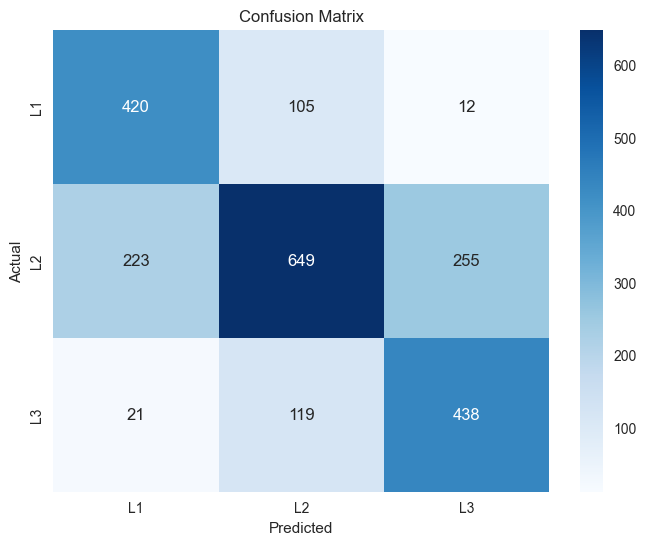

In [88]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create the confusion matrix
confusion = confusion_matrix(pred_level[f"{target}_copy"], pred_level[f"pred_{contaminant}"], labels=labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [89]:
## Get the total number of observations in each class
level_counts = pred_level[f"{target}_copy"].value_counts()
print ('\nN observation in each class:')
print (level_counts)

level_counts2 = pred_level[f"pred_{contaminant}"].value_counts()
print ('\nN observation in each class:')
print (level_counts2)


N observation in each class:
L2    1127
L3     578
L1     537
Name: tn_levels_copy, dtype: int64

N observation in each class:
L2    873
L3    705
L1    664
Name: pred_tn, dtype: int64


In [90]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for each level
accuracy_by_level = {}
for label in labels:
    true_positives = confusion[labels.index(label), labels.index(label)]
    total_predictions = sum(confusion[labels.index(label)])
    accuracy = true_positives / total_predictions
    accuracy_by_level[label] = accuracy
    print(f"Accuracy for {label}: {accuracy:.2f}")

# Calculate overall accuracy
overall_accuracy = accuracy_score(pred_level[f"{target}_copy"], pred_level[f"pred_{contaminant}"])
print(f"Overall Accuracy: {overall_accuracy:.2f}")


Accuracy for L1: 0.78
Accuracy for L2: 0.58
Accuracy for L3: 0.76
Overall Accuracy: 0.67


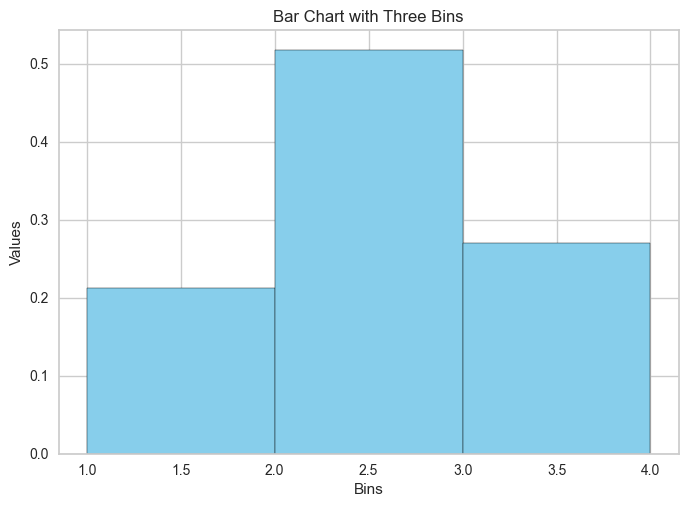

In [91]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

t = 102
p_c1 = pred_level.iloc[t][f"pred_{contaminant}_L1_score"]
p_c2 = pred_level.iloc[t][f"pred_{contaminant}_L2_score"]
p_c3 = pred_level.iloc[t][f"pred_{contaminant}_L3_score"]


## Probabilities for each class
thresholds = [0, 130, 560, 1000]
thresholds = [1, 2, 3, 4]
probabilities = [p_c1, p_c2, p_c3]


## Plot the bar chart
plt.bar(thresholds[:-1], probabilities, width=np.diff(thresholds), align='edge', color='skyblue', edgecolor='black')


## Add labels and title
plt.xlabel('Bins')
plt.ylabel('Values')
plt.title('Bar Chart with Three Bins')


## Show the plot
plt.show()

0.0384
0.3703
0.5914


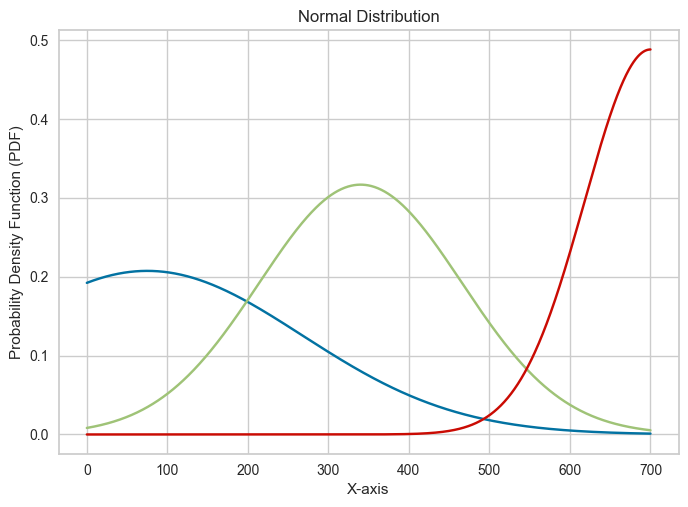

In [92]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# pred_level[pred_level[contaminant] > 3000.0]
min_contaminant = pred_level[contaminant].min()
max_contaminant = pred_level[contaminant].max()
mean_contaminant = pred_level[contaminant].mean()
std_contaminant = pred_level[contaminant].std()

t = 190
p_c1 = pred_level.iloc[t][f"pred_{contaminant}_L1_score"]
p_c2 = pred_level.iloc[t][f"pred_{contaminant}_L2_score"]
p_c3 = pred_level.iloc[t][f"pred_{contaminant}_L3_score"]

## Probabilities for each class
thresholds = [75, 340, 700]
probabilities = [p_c1, p_c2, p_c3]

for index, probablity in enumerate(probabilities):
    print(probablity)
    # Set the mean and standard deviation
    mean = thresholds[index]
    std_dev = (1 - probablity) * 200
    
    # Set the range for the x-axis
    x_start = 0
    x_end = 700
    
    # Generate data points for the normal distribution within the specified range
    x_values = np.linspace(x_start, x_end, 1000)
    y_values = norm.pdf(x_values, mean, std_dev) * 100
    
    # Plot the normal distribution
    plt.plot(x_values, y_values, label=f'Normal Distribution (Mean = {mean}, Std Dev = {std_dev})')

# Add labels and a legend
plt.title('Normal Distribution')
plt.xlabel('X-axis')
plt.ylabel('Probability Density Function (PDF)')
# plt.legend()

# Show the plot
plt.show()

## 3- TP Predictive Modelling

### Data Prepration

In [118]:
import pandas as pd

## Read and prepare the water quality measurements
observations = pd.read_json(f"prep_modeling_df.json")
observations.columns = observations.columns.str.lower().str.replace('.', '_')
observations.columns.to_list()

# observations.describe()
obs_columns = ['nz_segment', 'date',  'island', 'region', 'climate', 'geology', 'landcover', 'landcover_lawa', 'swq_landuse', 'src_of_flw',
               'ecoli', 'tn', 'tp', 'flow',
               'air_temp', 'air_temp_mean_dist', 'earth_temp', 'earth_temp_mean_dist', 'rain', 'rain_mean_dist', 'soil_moist', 'soil_moist_mean_dist',
               'mndwi_median', 'mndwi_stdv', 'ndvi_median', 'ndvi_stdv', 'nirv_median', 'nirv_stdv', 'nsmi_median', 'nsmi_stdv',
               'bsi_median', 'bsi_stdv', 'evi_median', 'evi_stdv', 'savi_median', 'savi_stdv', 'ndmi_median', 'ndmi_stdv', 'nbr_median', 'nbr_stdv',
               'ci_median', 'ci_stdv', 'lai_median', 'lai_stdv', 'fapar_median', 'fapar_stdv',
               'elevation_median', 'elevation_stdev','aspect_median','aspect_stdev', 'slope_median', 'slope_stdev', 'tri_median', 'tri_stdev',
                'length_m', 'strahler_order', 'dis_to_sea_m', 'catchment_area_m']

obs = observations[obs_columns]
obs.loc[:, "nz_segment"] = obs.loc[:, "nz_segment"].astype("string")
obs.drop_duplicates(["nz_segment", "date"]).reset_index(drop=True, inplace=True)
obs

,nz_segment,date,island,region,climate,geology,landcover,landcover_lawa,swq_landuse,src_of_flw,...,aspect_median,aspect_stdev,slope_median,slope_stdev,tri_median,tri_stdev,length_m,strahler_order,dis_to_sea_m,catchment_area_m
0,1002765,2019-01-17,North_Island,North Auckland,WW,VA,P,Rural,Rural,L,...,181.288025,106.364782,10.593521,6.568451,7.085887,4.446160,779.11688,6,9348.154,156565856.0
1,1002765,2019-02-12,North_Island,North Auckland,WW,VA,P,Rural,Rural,L,...,181.288025,106.364782,10.593521,6.568451,7.085887,4.446160,779.11688,6,9348.154,156565856.0
2,1002765,2019-04-03,North_Island,North Auckland,WW,VA,P,Rural,Rural,L,...,181.288025,106.364782,10.593521,6.568451,7.085887,4.446160,779.11688,6,9348.154,156565856.0
3,1002765,2019-05-01,North_Island,North Auckland,WW,VA,P,Rural,Rural,L,...,181.288025,106.364782,10.593521,6.568451,7.085887,4.446160,779.11688,6,9348.154,156565856.0
4,1002765,2019-06-05,North_Island,North Auckland,WW,VA,P,Rural,Rural,L,...,181.288025,106.364782,10.593521,6.568451,7.085887,4.446160,779.11688,6,9348.154,156565856.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20607,15320438,2020-08-10,South_Island,Southland,CW,SS,P,Rural,Rural,L,...,198.370239,105.728497,4.516188,5.139452,3.020083,3.444268,3701.90909,4,8425.950,72980104.0
20608,15320438,2020-09-07,South_Island,Southland,CW,SS,P,Rural,Rural,L,...,198.370239,105.728497,4.516188,5.139452,3.020083,3.444268,3701.90909,4,8425.950,72980104.0
20609,15320438,2020-10-12,South_Island,Southland,CW,SS,P,Rural,Rural,L,...,198.370239,105.728497,4.516188,5.139452,3.020083,3.444268,3701.90909,4,8425.950,72980104.0
20610,15320438,2020-11-16,South_Island,Southland,CW,SS,P,Rural,Rural,L,...,198.370239,105.728497,4.516188,5.139452,3.020083,3.444268,3701.90909,4,8425.950,72980104.0


In [119]:
clean_df = obs.dropna(subset=["air_temp_mean_dist", "earth_temp_mean_dist", "rain_mean_dist", "soil_moist_mean_dist"], axis=0)

clean_df = clean_df[clean_df["tri_median"] > clean_df["tri_stdev"]]
# # clean_df = clean_df[clean_df["mndwi_median"] > clean_df["mndwi_stdv"]]
# clean_df = clean_df[clean_df["ndvi_median"] > clean_df["ndvi_stdv"]]
# clean_df = clean_df[clean_df["nirv_median"] > clean_df["nirv_stdv"]]
# # clean_df = clean_df[clean_df["nsmi_median"] > clean_df["nsmi_stdv"]]
# # clean_df = clean_df[clean_df["bsi_median"] > clean_df["bsi_stdv"]]
# # clean_df = clean_df[clean_df["evi_median"] > clean_df["evi_stdv"]]
# # clean_df = clean_df[clean_df["savi_median"] > clean_df["savi_stdv"]]
# # clean_df = clean_df[clean_df["ndmi_median"] > clean_df["ndmi_stdv"]]
# # clean_df = clean_df[clean_df["nbr_median"] > clean_df["nbr_stdv"]]
# # clean_df = clean_df[clean_df["ci_median"] > clean_df["ci_stdv"]]
# # clean_df = clean_df[clean_df["lai_median"] > clean_df["lai_stdv"]]
# clean_df = clean_df[clean_df["fapar_median"] > clean_df["fapar_stdv"]]

clean_df.reset_index(drop=True, inplace=True)

In [121]:
import numpy as np
import pandas as pd
import gc

## Define the thresholds
# thresholds = [0, 0.1, 0.20, 0.5, float('inf')]
thresholds = [0, 0.01, 0.05, float('inf')]

## Define the labels for the ordinal levels
# labels = ['L1', 'L2', 'L3', 'L4']
labels = ['L1', 'L2', 'L3']

## Define the target variable
contaminant = 'tp'
target = f"{contaminant}_levels"
features = ["mndwi_median", "ndvi_median", "nirv_median", "nsmi_median", "bsi_median", 
           "evi_median", "savi_median", "ndmi_median", "ci_median", "lai_median",
           "air_temp", "earth_temp", "rain", "soil_moist",
           "tri_median"]

## Create the ordinal column based on the thresholds
clean_df[target] = pd.cut(clean_df[contaminant], bins=thresholds, labels=labels, right=False)
clean_df[target] = clean_df[target].astype('category')

## Normalize the features using StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
clean_df[features] = scaler.fit_transform(clean_df[features])

## Select only the target variable and its predictors
selected_columns = features + [target, contaminant]
clean_df = clean_df[selected_columns]

## Clean up rows with No Data values
clean_df = clean_df.replace([np.inf, -np.inf], np.nan)
clean_df = clean_df.dropna(subset=selected_columns)
print("\nNumber of rows with NaN in each column:")
print(clean_df.isnull().sum())

## This unseen data is different from the train / test data
train_obs = clean_df.sample (frac = 0.8, random_state = 786)
test_obs = clean_df.drop (train_obs.index)
test_obs[f"{target}_copy"] = test_obs[target]
test_obs = test_obs.drop(columns=target)

test_obs.reset_index (drop=True, inplace=True)
print('Data for Modeling: ' + str(train_obs.shape))
print('Unseen Data For Predictions: ' + str(test_obs.shape))

## Get the total number of observations in each class
level_counts = clean_df[target].value_counts()
print ('\nN observation in each class:')
print (level_counts)

## Group the DataFrame by the target column
grouped = clean_df.groupby(target, observed=False) ######################## Change "clean_df" to "train_obs" if you like

## Calculate the minimum count for any level
min_count = grouped.size().min()

## Take a random sample of the minimum count from each group
sampled_obs = grouped.apply(lambda x: x.sample(n=min_count))
sampled_obs = sampled_obs.reset_index(drop=True)
print('\nNumber of sampled observations: ' + str(sampled_obs.shape))

train_obs = None
grouped = None
gc.collect()


Number of rows with NaN in each column:
mndwi_median    0
ndvi_median     0
nirv_median     0
nsmi_median     0
bsi_median      0
evi_median      0
savi_median     0
ndmi_median     0
ci_median       0
lai_median      0
air_temp        0
earth_temp      0
rain            0
soil_moist      0
tri_median      0
tp_levels       0
tp              0
dtype: int64
Data for Modeling: (8558, 17)
Unseen Data For Predictions: (2140, 17)

N observation in each class:
L2    5976
L1    2750
L3    1972
Name: tp_levels, dtype: int64

Number of sampled observations: (5916, 17)


0

### Model Building

In [122]:
from pycaret.classification import ClassificationExperiment
clas_exp = ClassificationExperiment()

# ## set tracking uri 
# import mlflow 
# mlflow.set_tracking_uri("file:/D:/OneDrive/Work/Imaginative AI/Projects/Aqua-Anaytica Prepration/mlflow-server")
        
## setup a modelling practice
clas_exp.setup(
    ## *************** General details ***************
    data = sampled_obs, target = target,
    session_id = 123, # A seed value to base the random process
    # log_experiment = False, # Logs the mlexperiment if set to True
    # experiment_name = "reg-default-name", # An identifier to track the experiment in the log file
    
    ## *************** Missing values ***************
    # numeric_imputation = "mean",
    # categorical_imputation = "constant",
    
    ## *************** Normalization and Transformation ***************
    # normalize = True, # Normalizes features to eleminate the unite effect
    # normalize_method = "zscore",
    # transformation = True, # Transforms the features to a more normal distribution
    # fix_imbalance = True, # Deal with unequal distribution of target
    # transform_target = True, # Transforms the target to a more normal distribution
    # bin_numeric_features = ["column_name"], # Converts a continous feature to a categorical feature
                                 # It uses the ‘sturges’ rule to determine the number of bins
                                 # and K-Means clustering to convert continuous into categorical features
    # fix_imbalance = True, # Deals with imbalance target
    
    # *************** Feature Encoding ***************
    # ordinal_features = {'column' : ['low', 'medium', 'high']}
    # numeric_features = ,
    # categorical_features = ["src_of_flw"],
    
    ## *************** Feature selection ***************
    ignore_features = ["#", contaminant], # Ignor some columns in the modelling.
                                          # It gets overwright when "feature_selection" is set True
    # feature_selection = True, # Selects the best feature for predicting the target value
    # n_features_to_select = 0.5, # Minimum number of features, for example top 50%
    remove_multicollinearity = True, # Drops one feature in case of highcolinearity with another feature
    # pca = True, # Uses PCA to reduce the feature space
    # pca_components = 4, # The number of PCA to keep, here frst 4 components
    preprocess = False, # Data must be ready for modeling (no missing values, no dates,
                     # categorical data encoding) when preprocess is set to False.
    
    ## *************** Oveal Tunning ***************
    n_jobs = -1, # Parallel processing (default = -1, all resources)
    # use_gpu = False,
    verbose = True, # To stop printing the information grid
    profile = False, # When set to True, an interactive EDA report is displayed
)

## Get all available estimators
clas_exp.models()

,Description,Value
0,Session id,123
1,Target,tp_levels
2,Target type,Multiclass
3,Original data shape,"(5916, 17)"
4,Transformed data shape,"(5916, 16)"
5,Transformed train set shape,"(4141, 16)"
6,Transformed test set shape,"(1775, 16)"
7,Ignore features,2
8,Numeric features,15


,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


#### Create Model Function (Create and tune models seprately and blend them together in a meta model)

In [123]:
## Compare all available models based on their performances
clas_exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6527,0.8242,0.6527,0.6492,0.6498,0.4791,0.4799,1.4970
gbc,Gradient Boosting Classifier,0.6250,0.8032,0.6250,0.6208,0.6206,0.4374,0.4391,1.4370
rf,Random Forest Classifier,0.6180,0.7973,0.6180,0.6124,0.6135,0.4269,0.4281,0.6010
et,Extra Trees Classifier,0.6177,0.7938,0.6177,0.6126,0.6136,0.4266,0.4277,0.0940
dt,Decision Tree Classifier,0.5924,0.6943,0.5924,0.5930,0.5922,0.3885,0.3889,0.4280
knn,K Neighbors Classifier,0.5658,0.7448,0.5658,0.5611,0.5601,0.3487,0.3507,0.4600
lda,Linear Discriminant Analysis,0.5612,0.7307,0.5612,0.5517,0.5519,0.3418,0.3447,0.0180
ada,Ada Boost Classifier,0.5610,0.7375,0.5610,0.5538,0.5555,0.3414,0.3426,0.1790
lr,Logistic Regression,0.5605,0.7304,0.5605,0.5510,0.5510,0.3407,0.3437,0.5620
ridge,Ridge Classifier,0.5571,0.0000,0.5571,0.5431,0.5286,0.3356,0.3482,0.4180


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [124]:
## Train and optimise the model
lightgbm_model = clas_exp.create_model("lightgbm")
# clas_exp.plot_model(lightgbm_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

tun_lightgbm_model = clas_exp.tune_model(lightgbm_model, n_iter=20, choose_better=True)
# clas_exp.plot_model(tun_lightgbm_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

# # ens_tun_lightgbm_model = clas_exp.ensemble_model(tun_lightgbm_model, method="Boosting")
# # clas_exp.plot_model(ens_tun_lightgbm_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

# # # cal_ens_tun_lightgbm_model = clas_exp.calibrate_model(ens_tun_lightgbm_model)
# # # clas_exp.plot_model(cal_ens_tun_lightgbm_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

final_lightgbm_model = clas_exp.finalize_model(tun_lightgbm_model)

# # ## Analyse the model
# # clas_exp.plot_model(final_lightgbm_model, plot = 'class_report')
# # clas_exp.interpret_model(final_lightgbm_model, plot='reason')
# # ''' Other options for interpret_model() function
# #     'summary': Provides a summary of feature importance.
# #     'correlation': Displays correlation between features.
# #     'reason': Generates a Reason Plot.
# #     'pdp': Generates Partial Dependence Plots.
# #     'msa': Generates Model Sensitive Analysis plots.
# #     'pfi': Generates Permutation Feature Importance plots.
# # '''
## launch evaluate widget
clas_exp.evaluate_model(tun_lightgbm_model)

## Save the model
clas_exp.save_model(
    final_lightgbm_model, 
    model_name =f"final_{contaminant}_lightgbm_model", 
    model_only = False
)



## Train and optimise the model
rf_model = clas_exp.create_model("rf")
# clas_exp.plot_model(rf_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

tun_rf_model = clas_exp.tune_model(rf_model, n_iter=20, choose_better=True)
# clas_exp.plot_model(tun_rf_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

# # ens_tun_rf_model = clas_exp.ensemble_model(tun_rf_model, method="Boosting")
# # clas_exp.plot_model(ens_tun_rf_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

# # cal_ens_tun_rf_model = clas_exp.calibrate_model(ens_tun_rf_model)
# # clas_exp.plot_model(cal_ens_tun_rf_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

final_rf_model = clas_exp.finalize_model(tun_rf_model)

## launch evaluate widget
clas_exp.evaluate_model(tun_rf_model)

# Save the model
clas_exp.save_model(
    final_rf_model, 
    model_name = f"final_{contaminant}_rf_model", 
    model_only = False
)



## Train and optimise the model
gbc_model = clas_exp.create_model("gbc")
# clas_exp.plot_model(gbc_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

tun_gbc_model = clas_exp.tune_model(gbc_model, n_iter=20, choose_better=True)
# clas_exp.plot_model(tun_gbc_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

# # ens_tun_gbc_model = clas_exp.ensemble_model(tun_gbc_model, method="Boosting")
# # clas_exp.plot_model(ens_tun_gbc_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

# # cal_ens_tun_gbc_model = clas_exp.calibrate_model(tun_gbc_model)
# # clas_exp.plot_model(cal_ens_tun_gbc_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

final_gbc_model = clas_exp.finalize_model(tun_gbc_model)

## launch evaluate widget
clas_exp.evaluate_model(tun_gbc_model)

## Save the model
clas_exp.save_model(
    final_gbc_model, 
    model_name = f"final_{contaminant}_gbc_model", 
    model_only = False
)


bld_final_model = clas_exp.blend_models([final_lightgbm_model, final_gbc_model, final_rf_model], method="soft")
# clas_exp.plot_model(bld_final_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})
## Save the model
clas_exp.save_model(
    bld_final_model, 
    model_name = f"final_{contaminant}_blend_model", 
    model_only = False
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6892,0.8352,0.6892,0.6891,0.6891,0.5337,0.5338
1,0.6546,0.8304,0.6546,0.6506,0.6510,0.4819,0.4831
2,0.6425,0.8136,0.6425,0.6347,0.6363,0.4638,0.4655
3,0.6135,0.8111,0.6135,0.6072,0.6094,0.4203,0.4210
4,0.6353,0.8153,0.6353,0.6348,0.6341,0.4529,0.4536
5,0.6546,0.8176,0.6546,0.6472,0.6490,0.4819,0.4833
6,0.6546,0.8189,0.6546,0.6543,0.6540,0.4819,0.4822
7,0.6473,0.8185,0.6473,0.6445,0.6441,0.4710,0.4724
8,0.6522,0.8237,0.6522,0.6480,0.6497,0.4783,0.4786


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6747,0.8324,0.6747,0.6798,0.6756,0.5120,0.5133
1,0.6232,0.8018,0.6232,0.6145,0.6167,0.4348,0.4364
2,0.6063,0.8059,0.6063,0.6065,0.6064,0.4094,0.4094
3,0.6449,0.8064,0.6449,0.6407,0.6409,0.4674,0.4689
4,0.5870,0.7899,0.5870,0.5889,0.5868,0.3804,0.3811
5,0.6425,0.8056,0.6425,0.6443,0.6432,0.4638,0.4639
6,0.6691,0.8214,0.6691,0.6700,0.6694,0.5036,0.5037
7,0.6135,0.8048,0.6135,0.6110,0.6104,0.4203,0.4215
8,0.6353,0.8147,0.6353,0.6307,0.6325,0.4529,0.4533


Fitting 10 folds for each of 20 candidates, totalling 200 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Transformation Pipeline and Model Successfully Saved


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6482,0.8250,0.6482,0.6434,0.6446,0.4723,0.4732
1,0.5966,0.7922,0.5966,0.5890,0.5895,0.3949,0.3972
2,0.6135,0.7899,0.6135,0.6102,0.6110,0.4203,0.4209
3,0.6039,0.7808,0.6039,0.5970,0.5978,0.4058,0.4076
4,0.5725,0.7833,0.5725,0.5712,0.5714,0.3587,0.3590
5,0.6256,0.7948,0.6256,0.6189,0.6205,0.4384,0.4397
6,0.6377,0.8062,0.6377,0.6355,0.6356,0.4565,0.4572
7,0.6014,0.7771,0.6014,0.5929,0.5940,0.4022,0.4044
8,0.6184,0.7950,0.6184,0.6075,0.6112,0.4275,0.4288


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6434,0.8090,0.6434,0.6381,0.6387,0.4650,0.4665
1,0.5942,0.7928,0.5942,0.5862,0.5874,0.3913,0.3932
2,0.5918,0.7717,0.5918,0.5882,0.5894,0.3877,0.3881
3,0.5942,0.7856,0.5942,0.5854,0.5864,0.3913,0.3936
4,0.5604,0.7684,0.5604,0.5568,0.5575,0.3406,0.3412
5,0.6014,0.7910,0.6014,0.5907,0.5933,0.4022,0.4042
6,0.6087,0.7966,0.6087,0.5997,0.6021,0.4130,0.4145
7,0.6087,0.7756,0.6087,0.5997,0.5989,0.4130,0.4168
8,0.6039,0.7962,0.6039,0.5975,0.6002,0.4058,0.4062


Fitting 10 folds for each of 20 candidates, totalling 200 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Transformation Pipeline and Model Successfully Saved


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6578,0.8129,0.6578,0.6552,0.6558,0.4867,0.4872
1,0.6063,0.8006,0.6063,0.5986,0.5992,0.4094,0.4117
2,0.6208,0.7789,0.6208,0.6155,0.6174,0.4312,0.4317
3,0.6159,0.8015,0.6159,0.6065,0.6057,0.4239,0.4279
4,0.6087,0.7782,0.6087,0.6116,0.6076,0.4130,0.4148
5,0.6135,0.8072,0.6135,0.6044,0.6070,0.4203,0.4217
6,0.6353,0.8030,0.6353,0.6349,0.6341,0.4529,0.4535
7,0.6159,0.8050,0.6159,0.6121,0.6085,0.4239,0.4281
8,0.6280,0.8094,0.6280,0.6239,0.6252,0.4420,0.4425


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7036,0.8548,0.7036,0.7036,0.7036,0.5554,0.5554
1,0.6667,0.8319,0.6667,0.6611,0.6626,0.5000,0.5010
2,0.6522,0.8297,0.6522,0.6480,0.6495,0.4783,0.4787
3,0.6498,0.8304,0.6498,0.6483,0.6480,0.4746,0.4753
4,0.6377,0.8167,0.6377,0.6372,0.6369,0.4565,0.4569
5,0.6643,0.8240,0.6643,0.6584,0.6604,0.4964,0.4971
6,0.6787,0.8414,0.6787,0.6783,0.6782,0.5181,0.5183
7,0.6594,0.8375,0.6594,0.6545,0.6546,0.4891,0.4910
8,0.6787,0.8419,0.6787,0.6766,0.6773,0.5181,0.5184


Fitting 10 folds for each of 20 candidates, totalling 200 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Transformation Pipeline and Model Successfully Saved


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6988,0.8520,0.6988,0.6985,0.6985,0.5482,0.5483
1,0.6667,0.8328,0.6667,0.6601,0.6615,0.5000,0.5014
2,0.6449,0.8253,0.6449,0.6381,0.6399,0.4674,0.4686
3,0.6256,0.8226,0.6256,0.6209,0.6219,0.4384,0.4394
4,0.6473,0.8203,0.6473,0.6487,0.6473,0.4710,0.4715
5,0.6594,0.8226,0.6594,0.6523,0.6540,0.4891,0.4906
6,0.6739,0.8356,0.6739,0.6753,0.6741,0.5109,0.5112
7,0.6594,0.8267,0.6594,0.6559,0.6549,0.4891,0.4913
8,0.6522,0.8328,0.6522,0.6477,0.6494,0.4783,0.4787


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('placeholder', None),
                 ('trained_model',
                  VotingClassifier(estimators=[('Light Gradient Boosting '
                                                'Machine',
                                                Pipeline(memory=Memory(location=None),
                                                         steps=[('placeholder',
                                                                 None),
                                                                ('actual_estimator',
                                                                 LGBMClassifier(boosting_type='gbdt',
                                                                                class_weight=None,
                                                                                colsample_bytree=1.0,
                                                                                importance_type='split',
                   

#### Compare Model Function (Compare, select, create, tune, and blend several models at once)

In [ ]:
# top_n = clas_exp.compare_models(n_select = 3)
# tun_top_n = [clas_exp.tune_model(model, n_iter=10, fold=10, choose_better = True) for model in top_n]
# ens_tun_top_n = [clas_exp.ensemble_model(model, method="Boosting") for model in tun_top_n]
# bld_ens_tun_top_n = clas_exp.blend_models([ens_tun_top_n[0], ens_tun_top_n[1], ens_tun_top_n[2]], method="soft")

In [ ]:
# clas_exp.plot_model(bld_ens_tun_top_n, plot = 'confusion_matrix')
# # clas_exp.plot_model(bld_ens_tun_top_n, plot = 'class_report')

In [ ]:
# # calibrated_blend_boost_tunned_top_n = clas_exp.calibrate_model(blend_boost_tunned_top_n)
# final_model = clas_exp.finalize_model(bld_ens_tun_top_n)
# clas_exp.plot_model(final_model, plot = 'confusion_matrix')

In [ ]:
# ## Save the model
# clas_exp.save_model(
#     final_model, 
#     model_name = "final_top_n_ecoli_models", 
#     model_only = False
# )

### Model Implementation

In [99]:
from pycaret.classification import ClassificationExperiment
clas_exp = ClassificationExperiment()

# ## set tracking uri 
# import mlflow 
# mlflow.set_tracking_uri("file:/D:/OneDrive/Work/Imaginative AI/Projects/Aqua-Anaytica Prepration/mlflow-server")
        
## setup a modelling practice
clas_exp.setup(
    data = sampled_obs, target = target,
    session_id = 123, # A seed value to base the random process
    ignore_features = ["#", contaminant], # Ignor some columns in the modelling.
    remove_multicollinearity = True, # Drops one feature in case of highcolinearity with another feature
    preprocess = False, # Data must be ready for modeling (no missing values, no dates,
    n_jobs = -1, # Parallel processing (default = -1, all resources)
    verbose = True, # To stop printing the information grid
    profile = False, # When set to True, an interactive EDA report is displayed
)

## Get all available estimators
clas_exp.models()

## Load and evaluate the model
bld_final_model = clas_exp.load_model(model_name = "final_tp_blend_model",  verbose = True)

,Description,Value
0,Session id,123
1,Target,tp_levels
2,Target type,Multiclass
3,Original data shape,"(4620, 17)"
4,Transformed data shape,"(4620, 16)"
5,Transformed train set shape,"(3234, 16)"
6,Transformed test set shape,"(1386, 16)"
7,Ignore features,2
8,Numeric features,15


Transformation Pipeline and Model Successfully Loaded


In [100]:
%%capture
## Predict on test set
pred_level = clas_exp.predict_model(bld_final_model, raw_score=True, data=test_obs,);

#### Testing the Accurecy

In [101]:
## Rename the columns
pred_level = pred_level.rename(
    columns={
        "prediction_label": f"pred_{contaminant}",
        "prediction_score_0": f"pred_{contaminant}_L1_score",
        "prediction_score_1": f"pred_{contaminant}_L2_score",
        "prediction_score_2":  f"pred_{contaminant}_L3_score",
    }
)
pred_level

,mndwi_median,ndvi_median,nirv_median,nsmi_median,bsi_median,evi_median,savi_median,ndmi_median,ci_median,lai_median,...,earth_temp,rain,soil_moist,tri_median,tp,tp_levels_copy,pred_tp,pred_tp_L1_score,pred_tp_L2_score,pred_tp_L3_score
0,0.286004,0.707704,0.475933,0.391213,0.608774,0.505154,0.707505,0.391213,0.390457,0.000000e+00,...,0.779686,0.000000,0.258354,0.279147,0.012,L2,L2,0.1058,0.5845,0.3096
1,0.249937,0.851451,0.454511,0.492350,0.507633,0.493458,0.848044,0.492350,0.341044,0.000000e+00,...,0.434215,0.020968,0.445174,0.279147,0.018,L2,L2,0.1352,0.6765,0.1882
2,0.294004,0.785964,0.515528,0.499173,0.500816,0.543056,0.785072,0.499173,0.329522,6.391774e-25,...,0.532999,0.000000,0.540708,0.279147,0.012,L2,L2,0.0849,0.7413,0.1737
3,0.248916,0.705923,0.421014,0.317007,0.682984,0.472547,0.707530,0.317007,0.445744,0.000000e+00,...,0.755358,0.000000,0.143291,0.279147,0.011,L2,L2,0.1241,0.6038,0.2720
4,0.306058,0.785946,0.454508,0.492383,0.507611,0.527174,0.785056,0.492383,0.324195,0.000000e+00,...,0.385368,0.019355,0.619055,0.279147,0.017,L2,L2,0.0544,0.7506,0.1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2135,0.314068,0.815069,0.646757,0.580076,0.419913,0.509831,0.818994,0.580076,0.290976,0.000000e+00,...,0.273399,0.000000,0.569799,0.006510,0.026,L2,L3,0.2435,0.1722,0.5843
2136,0.261913,0.844149,0.832861,0.492418,0.507570,0.500767,0.840820,0.492418,0.246832,0.000000e+00,...,0.458835,0.283505,0.224624,0.006510,0.065,L3,L2,0.1693,0.5457,0.2849
2137,0.253933,0.844181,0.726093,0.505873,0.494119,0.483376,0.840833,0.505873,0.250912,0.000000e+00,...,0.358748,0.014260,0.736905,0.006510,0.033,L2,L3,0.0543,0.1669,0.7788
2138,0.314066,0.866025,0.445399,0.613797,0.386188,0.594204,0.870014,0.613797,0.163157,0.000000e+00,...,0.163072,0.043643,0.577130,0.004699,0.042,L2,L3,0.0791,0.1888,0.7321


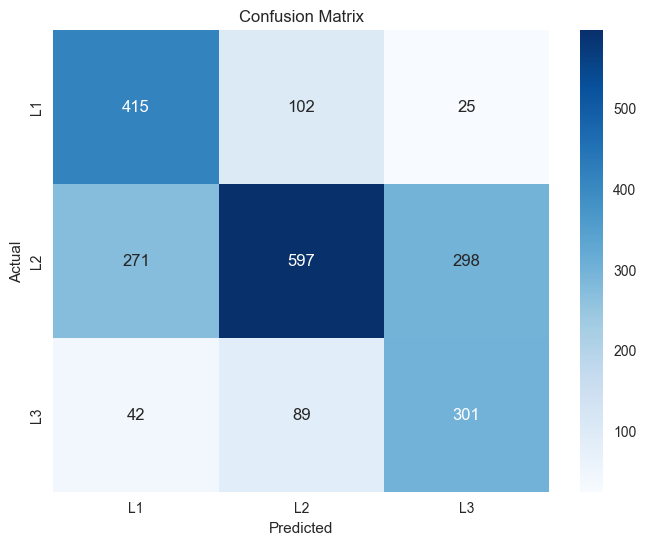

In [102]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create the confusion matrix
confusion = confusion_matrix(pred_level[f"{target}_copy"], pred_level[f"pred_{contaminant}"], labels=labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [103]:
## Get the total number of observations in each class
level_counts = pred_level[f"{target}_copy"].value_counts()
print ('\nN observation in each class:')
print (level_counts)

level_counts2 = pred_level[f"pred_{contaminant}"].value_counts()
print ('\nN observation in each class:')
print (level_counts2)


N observation in each class:
L2    1166
L1     542
L3     432
Name: tp_levels_copy, dtype: int64

N observation in each class:
L2    788
L1    728
L3    624
Name: pred_tp, dtype: int64


In [104]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for each level
accuracy_by_level = {}
for label in labels:
    true_positives = confusion[labels.index(label), labels.index(label)]
    total_predictions = sum(confusion[labels.index(label)])
    accuracy = true_positives / total_predictions
    accuracy_by_level[label] = accuracy
    print(f"Accuracy for {label}: {accuracy:.2f}")

# Calculate overall accuracy
overall_accuracy = accuracy_score(pred_level[f"{target}_copy"], pred_level[f"pred_{contaminant}"])
print(f"Overall Accuracy: {overall_accuracy:.2f}")


Accuracy for L1: 0.77
Accuracy for L2: 0.51
Accuracy for L3: 0.70
Overall Accuracy: 0.61


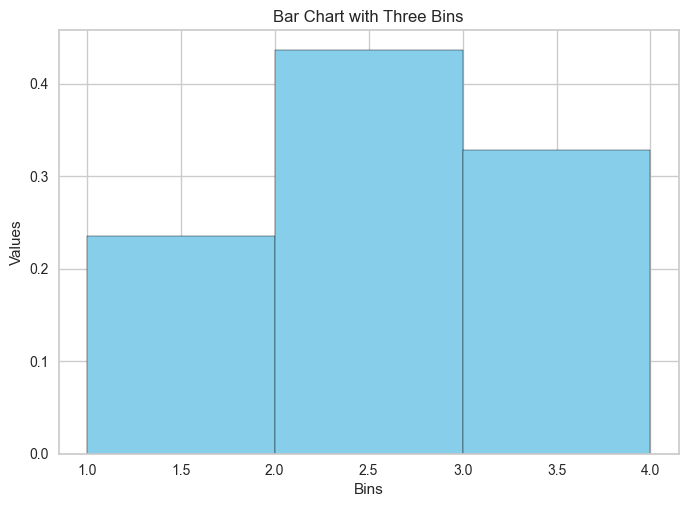

In [66]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

t = 102
p_c1 = pred_level.iloc[t][f"pred_{contaminant}_L1_score"]
p_c2 = pred_level.iloc[t][f"pred_{contaminant}_L2_score"]
p_c3 = pred_level.iloc[t][f"pred_{contaminant}_L3_score"]


## Probabilities for each class
thresholds = [0, 130, 560, 1000]
thresholds = [1, 2, 3, 4]
probabilities = [p_c1, p_c2, p_c3]


## Plot the bar chart
plt.bar(thresholds[:-1], probabilities, width=np.diff(thresholds), align='edge', color='skyblue', edgecolor='black')


## Add labels and title
plt.xlabel('Bins')
plt.ylabel('Values')
plt.title('Bar Chart with Three Bins')


## Show the plot
plt.show()

0.055
0.167
0.778


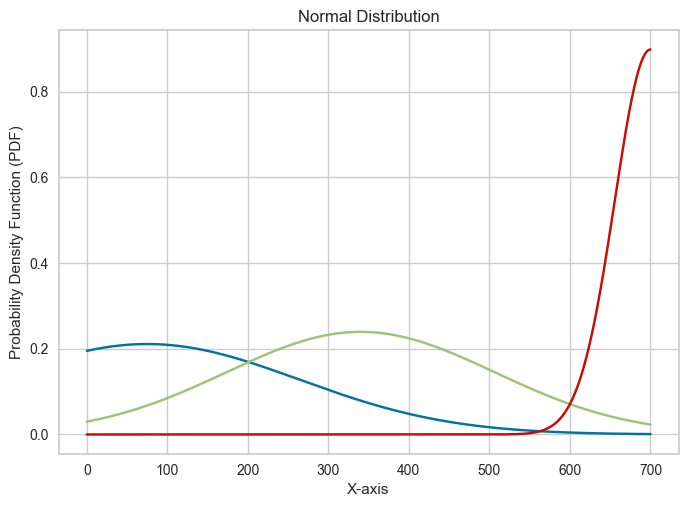

In [67]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# pred_level[pred_level[contaminant] > 3000.0]
min_contaminant = pred_level[contaminant].min()
max_contaminant = pred_level[contaminant].max()
mean_contaminant = pred_level[contaminant].mean()
std_contaminant = pred_level[contaminant].std()

t = 190
p_c1 = pred_level.iloc[t][f"pred_{contaminant}_L1_score"]
p_c2 = pred_level.iloc[t][f"pred_{contaminant}_L2_score"]
p_c3 = pred_level.iloc[t][f"pred_{contaminant}_L3_score"]

## Probabilities for each class
thresholds = [75, 340, 700]
probabilities = [p_c1, p_c2, p_c3]

for index, probablity in enumerate(probabilities):
    print(probablity)
    # Set the mean and standard deviation
    mean = thresholds[index]
    std_dev = (1 - probablity) * 200
    
    # Set the range for the x-axis
    x_start = 0
    x_end = 700
    
    # Generate data points for the normal distribution within the specified range
    x_values = np.linspace(x_start, x_end, 1000)
    y_values = norm.pdf(x_values, mean, std_dev) * 100
    
    # Plot the normal distribution
    plt.plot(x_values, y_values, label=f'Normal Distribution (Mean = {mean}, Std Dev = {std_dev})')

# Add labels and a legend
plt.title('Normal Distribution')
plt.xlabel('X-axis')
plt.ylabel('Probability Density Function (PDF)')
# plt.legend()

# Show the plot
plt.show()